In [1]:
# Our project is divided into six parts.
# Part One (Step 1 & 2): Prepare the data
# Part Two (Step 3 & 4): Initial observation for variables
# Part Three (Step 5): Preliminary analysis to explore the factors which influence First Time Attendees
# Part Four (Step 6): Preliminary analysis to explore the factors which influence Major Prospects
# Part Five (Step 7): Further analysis for Part Three and Part Four
# Part Six (Step 8): Other analysis: area comparison

In [2]:
# Part One: Prepare the Data

# Step 1: Preview the Data
import numpy as np
import pandas as pd

# 1.1 Change Display Options
pd.set_option("display.max_columns", 5)
pd.set_option("display.max_rows", 5)
pd.set_option("display.width", 150)

# 1.2 Import Data from Excel Files
dataAlumni1 = pd.read_excel("UMD Alumni Association Dataset.xlsx",sheet_name="2019-20")
dataAlumni2 = pd.read_excel("UMD Alumni Association Dataset.xlsx",sheet_name="2018-19")
dataAlumni3 = pd.read_excel("UMD Alumni Association Dataset.xlsx",sheet_name="2017-18")
dataAlumni4 = pd.read_excel("UMD Alumni Association Dataset.xlsx",sheet_name="2016-17")
dataAlumni5 = pd.read_excel("UMD Alumni Association Dataset.xlsx",sheet_name="2015-16")
dataAlumni6 = pd.read_excel("UMD Alumni Association Dataset.xlsx",sheet_name="2014-15")
dataAlumni7 = pd.read_excel("UMD Alumni Association Dataset.xlsx",sheet_name="2013-14")

# 1.3 Preview the Data on Each Sheet
print(dataAlumni1)
print(dataAlumni2)
print(dataAlumni3)
print(dataAlumni4)
print(dataAlumni5)
print(dataAlumni6)
print(dataAlumni7)

C:\Users\Xinyuan Chen\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


                                           Event Name Activity Code  ... Major Prospects Percentage Major Prospect
0                             Ocean City Summer Party         PEZOC  ...              12                  0.190476
1   Neurodiversity on Campus and in the Workplace ...         PEAPC  ...               0                  0.000000
..                                                ...           ...  ...             ...                       ...
69  Tucson Terps: Joint Football Watch Party with ...         PEAT6  ...               0                  0.000000
70               SF Bay Area Terps Picnic at Presidio         PEAS7  ...               0                  0.000000

[71 rows x 14 columns]
                                            Event Name Activity Code  ... Major Prospects Percentage Major Prospect
0                         UMD Alumni Virtual Book Club         PEAVB  ...              97                  0.058540
1    Recent Graduate Crooked Crab Brewery Tour & Ta...

In [3]:
# Step 2: Concatenate seven data frames into one data frame, which contains all the data from 2013 to 2020.
dataAlumni = pd.concat([dataAlumni1,dataAlumni2,dataAlumni3,dataAlumni4,dataAlumni5,dataAlumni6,dataAlumni7])
dataAlumni = dataAlumni.reset_index(drop=True)

# 2.1 Add a column "Year".
yearList = list()
for i in dataAlumni["Event Date"]:
    year = i.year
    yearList.append(year)
dataAlumni["Year"] = yearList
print(dataAlumni)

# 2.2 Detect Missing Values
pd.set_option("display.max_rows",0)
pd.set_option("display.max_columns",0)
print(dataAlumni[dataAlumni.isnull()==True].count())

                                            Event Name Activity Code  ... Percentage Major Prospect  Year
0                              Ocean City Summer Party         PEZOC  ...                  0.190476  2019
1    Neurodiversity on Campus and in the Workplace ...         PEAPC  ...                  0.000000  2019
..                                                 ...           ...  ...                       ...   ...
620                                  Terps on the Hill         PEZTH  ...                  0.135593  2014
621                NY Terps Alumnae Networking Dinner          PEANA  ...                  0.204545  2014

[622 rows x 15 columns]
Event Name                         0
Activity Code                      0
Activity Description               0
Location Code                      0
Location Description               0
Group Code                         0
Group Description                  0
Event Date                         0
Participated                       0
Averag

Desciptive Statistics of Number of Participated Alumni
count     622.000000
mean       44.803859
std        93.165049
min         1.000000
25%        10.000000
50%        20.000000
75%        44.750000
max      1657.000000
Name: Participated, dtype: float64


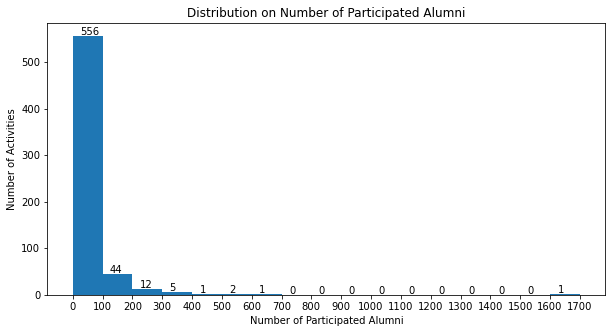

In [4]:
# Part Two: Initial Observation for Variables

# Step 3: Initial Observation for Variables with Numerical Values: Descriptive Statistics & Histogram
import matplotlib.pyplot as plt

# 3.1 Initial Observation for "Participated"
# 3.1.1 Show Descriptive Statistics
print("Desciptive Statistics of Number of Participated Alumni")
print(dataAlumni["Participated"].describe())
     
# 3.1.2 Show Distribution on "Participated" by Histogram
plt.figure(figsize=(10,5))
plt.hist(dataAlumni["Participated"],bins=17,range=(0,1700))
plt.xticks(range(0,1800,100))
plt.xlabel("Number of Participated Alumni")
plt.ylabel("Number of Activities")
plt.title("Distribution on Number of Participated Alumni")

# Add Data Labels for Each Column
xticks1 = np.arange(0,1800,100)
participated = np.array(list(dataAlumni["Participated"]))
count1=[0]*17
for i in range(0,17):
    for j in participated:
        if j>= xticks1[i] and j<xticks1[i+1]:
            count1[i] += 1
            
for x,y in zip(xticks1,count1):
    plt.text(x+25,y+3,str(y))
    
plt.show()

# Findings: (1) The maximum number of participants could be 1657 while minimum was only 1.
# (2) The number of participants for one activity was usually less than 100.

Descriptive Statistics of Average Age
count    622.000000
mean      40.117363
std        9.741459
min       19.000000
25%       33.000000
50%       40.000000
75%       46.000000
max       75.000000
Name: Average Age, dtype: float64


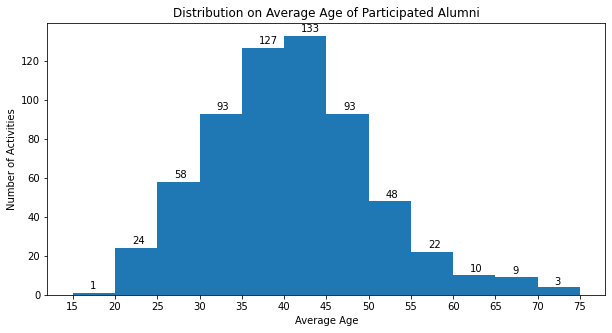

In [5]:
# 3.2 Initial Observation for "Average Age"
# 3.2.1 Show Descriptive Statistics 
print("Descriptive Statistics of Average Age")
print(dataAlumni["Average Age"].describe())

# 3.2.2 Show Distribution on "Average Age" by Histogram
plt.figure(figsize=(10,5))
plt.hist(dataAlumni["Average Age"],bins=12,range=(15,75))
plt.xticks(range(15,80,5))
plt.xlabel("Average Age")
plt.ylabel("Number of Activities")
plt.title("Distribution on Average Age of Participated Alumni")

# Add Data Labels for Each Column
xticks2 = np.arange(15,80,5)
averageAge = np.array(list(dataAlumni["Average Age"]))
count2=[0]*12
for i in range(0,12):
    for j in averageAge:
        if j>= xticks2[i] and j<xticks2[i+1]:
            count2[i] += 1
            
for x,y in zip(xticks2,count2):
    plt.text(x+2,y+2,str(y))

plt.show()

# Findings: (1) Most activities showed average age of Alumni from 25 to 55 years old.
# (2) Both the median and mean are around 40

Descriptive Statistics of Number of First Time Attendees
count    622.000000
mean      13.456592
std       41.103936
min        0.000000
25%        1.000000
50%        4.000000
75%       11.000000
max      702.000000
Name: First Time Attendees, dtype: float64


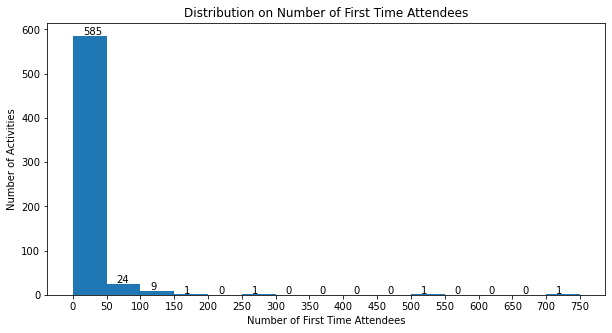

In [6]:
# 3.3 Initial Observation for "First Time Attendees"
# 3.3.1 Show Descriptive Statistics 
print("Descriptive Statistics of Number of First Time Attendees")
print(dataAlumni["First Time Attendees"].describe())

# 3.3.2 Shpw Distribution on "First Time Attendees" by Histogram
plt.figure(figsize=(10,5))
plt.hist(dataAlumni["First Time Attendees"],bins=15,range=(0,750))
plt.xticks(range(0,800,50))
plt.xlabel("Number of First Time Attendees")
plt.ylabel("Number of Activities")
plt.title("Distribution on Number of First Time Attendees")

# Add Data Labels for Each Column
xticks3 = np.arange(0,800,50)
firstTimeAttendees = np.array(list(dataAlumni["First Time Attendees"]))
count3=[0]*15
for i in range(0,15):
    for j in firstTimeAttendees:
        if j>= xticks3[i] and j<xticks3[i+1]:
            count3[i] += 1
for x,y in zip(xticks3,count3):
    plt.text(x+15,y+2,str(y))

plt.show()

# Findings: (1) Some activities had extremely large number of first time attendees, which made mean much larger than median
# (2) Most activities had less than 100 first time attendees.

Descriptive Statistics of Percentage First Time Attendees
count    622.000000
mean       0.276282
std        0.242273
min        0.000000
25%        0.068523
50%        0.237327
75%        0.444444
max        1.000000
Name: Percentage First Time Attendees, dtype: float64


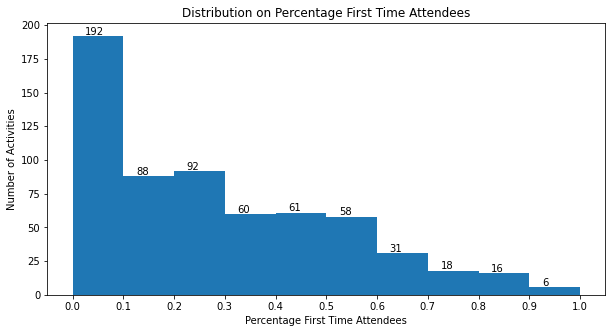

In [7]:
# 3.4 Initial Observation for "Percentage First Time Attendees"
# 3.4.1 Show Descriptive Statistics
print("Descriptive Statistics of Percentage First Time Attendees")
print(dataAlumni["Percentage First Time Attendees"].describe())

# 3.4.2 Show Distribution on "Percentage First Time Attendees" by Histogram
plt.figure(figsize=(10,5))
plt.hist(dataAlumni["Percentage First Time Attendees"],bins=10,range=(0,1))
plt.xlabel("Percentage First Time Attendees")
plt.ylabel("Number of Activities")
plt.title("Distribution on Percentage First Time Attendees")
plt.xticks(np.arange(0,1.1,0.1))

# Add Data Labels for Each Column
xticks4 = np.arange(0,1.1,0.1)
pctFirstTimeAttendees = np.array(list(dataAlumni["Percentage First Time Attendees"]))
count4=[0]*10
for i in range(0,10):
    for j in pctFirstTimeAttendees:
        if j>= xticks4[i] and j<xticks4[i+1]:
            count4[i] += 1
        if i==9 and j==xticks4[i+1]:
            count4[i] += 1
            
for x,y in zip(xticks4,count4):
    plt.text(x+0.025,y+1,str(y))

plt.show()

# Findings: (1) The maximum percentage of first time attendees could be 1 while minimum was 0.
# (2) The distribution of Percentage First Time Attendees is right skewed. Most of the activities had the percentage less than 0.3.
# (3) The mean and median are both around 0.25.

Descriptive Statistics of Number of Major Prospect Alumni
count    622.000000
mean       5.966238
std       14.123466
min        0.000000
25%        0.000000
50%        1.000000
75%        5.000000
max      131.000000
Name: Major Prospects, dtype: float64


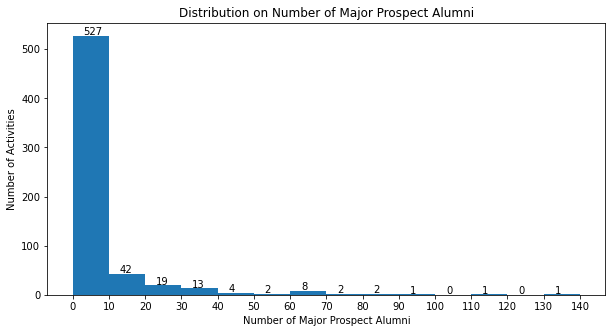

In [8]:
# 3.5 Initial Observation for "Major Prospects"
# 3.5.1 Show Descriptive Statistics 
print("Descriptive Statistics of Number of Major Prospect Alumni")
print(dataAlumni["Major Prospects"].describe())

# 3.5.2 Show Distribution on "Major Prospects" by Histogram
plt.figure(figsize=(10,5))
plt.hist(dataAlumni["Major Prospects"],bins=14,range=(0,140))
plt.xticks(range(0,150,10))
plt.xlabel("Number of Major Prospect Alumni")
plt.ylabel("Number of Activities")
plt.title("Distribution on Number of Major Prospect Alumni")

# Add Data Labels for Each Column
xticks5 = np.arange(0,150,10)
majorProspect = np.array(list(dataAlumni["Major Prospects"]))
count5=[0]*14
for i in range(0,14):
    for j in majorProspect:
        if j>= xticks5[i] and j<xticks5[i+1]:
            count5[i] += 1
            
for x,y in zip(xticks5,count5):
    plt.text(x+3,y+2,str(y))

plt.show()

# Findings: (1) The maximum number of major prospects could be 131 while minimum was 0.
# (2) Most activities had less than 20 major prospects.

Descriptive Statistics of Percentage Major Prospect
count    622.000000
mean       0.102214
std        0.131444
min        0.000000
25%        0.000000
50%        0.058824
75%        0.166667
max        0.818182
Name: Percentage Major Prospect, dtype: float64


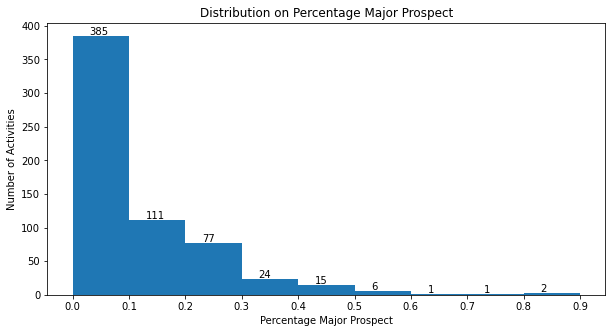

In [9]:
# 3.6 Initial Observation for "Percentage Major Prospect"
# 3.6.1 Show Descriptive Statistics 
print("Descriptive Statistics of Percentage Major Prospect")
print(dataAlumni["Percentage Major Prospect"].describe())

# 3.6.2 Show Distribution on "Percentage Major Prospects" by Histogram
plt.figure(figsize=(10,5))
plt.hist(dataAlumni["Percentage Major Prospect"],bins=9,range=(0,0.9))
plt.xticks(np.arange(0,1.0,0.1))
plt.xlabel("Percentage Major Prospect")
plt.ylabel("Number of Activities")
plt.title("Distribution on Percentage Major Prospect")

# Add Data Labels for Each Column
xticks6 = np.arange(0,1.0,0.1)
pctMajorProspect = np.array(list(dataAlumni["Percentage Major Prospect"]))
count6=[0]*9
for i in range(0,9):
    for j in pctMajorProspect:
        if j>= xticks6[i] and j<xticks6[i+1]:
            count6[i] += 1
            
for x,y in zip(xticks6,count6):
    plt.text(x+0.03,y+2,str(y))

plt.show()

# Findings: (1) The maximum percentage of major prospect could be 1 while minimum was 0.
# (2) The distribution of Percentage Major Prospect is right skewed. Most of the activities had the percentage less than 0.3.

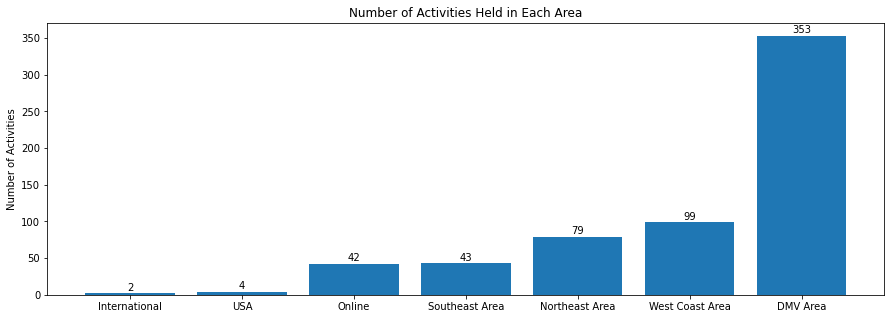

In [10]:
#Step 4: Initial Observation for Variables with Categorical Values: Bar Chart

# 4.1 Initial Observation for "Location"
# 4.1.1 Create Area Code for Each Row
areaList = []
for i in dataAlumni["Location Code"]:
    areaCode = i[1]
    if areaCode == 'O':
        area = "Online"
    elif areaCode == 'W':
        area = "West Coast Area"
    elif areaCode == 'N': 
        area = "Northeast Area"
    elif areaCode == 'D':
        area = "DMV Area"
    elif areaCode == 'S':
        area = "Southeast Area"
    elif areaCode == "I":
        area = "International"
    elif areaCode == "9":
        area = "USA"
    areaList.append(area)
dataAlumni["Area"] = areaList

# 4.1.2 Show the Number of Activities Held in Each Area by Bar Chart
# 4.1.2.1 Create a Data Frame with "Area" Column and "Number of Activities" Column
areaCount = dataAlumni.groupby("Area",as_index=False)["Event Name"].count()
areaCount.columns=["Area","Number of Activities"]
areaCount = areaCount.sort_values(["Number of Activities"])

# 4.1.2.2 Visualize Number of Activities Held in Each Area
plt.figure(figsize=(15,5))
areaBar=plt.bar(x=areaCount["Area"],height=areaCount["Number of Activities"])
plt.ylabel("Number of Activities")
plt.title("Number of Activities Held in Each Area")

# Create Data Labels for Each Bar
areaCountList=[]
for i in range(0,7):
    areaCountList.append(areaCount.values[i][1])
for x,y in zip(areaCount["Area"],areaCountList):
    plt.text(x,y+1,str(y),fontsize=10,ha="center",va="bottom")

plt.show()

# Finding: Over 300% more activities were held in the DMV compared to other areas.

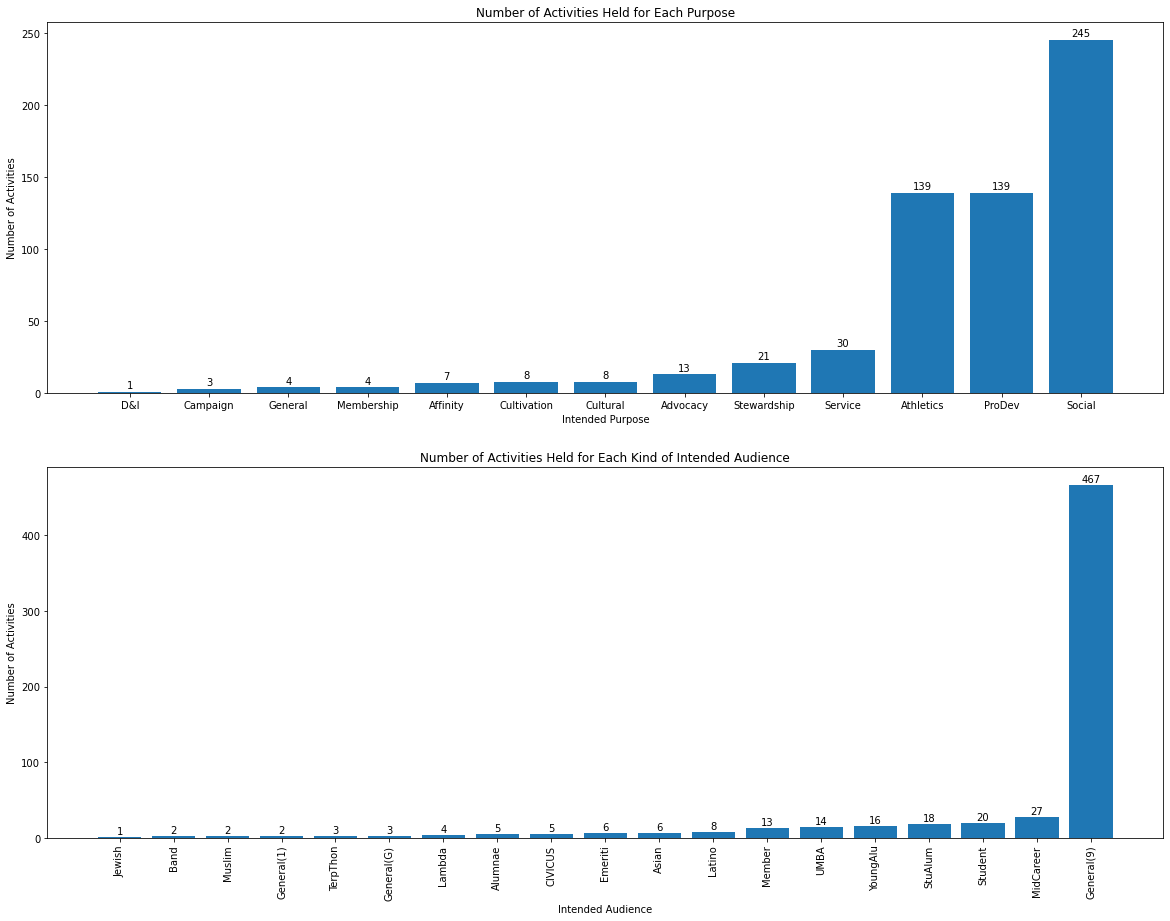

In [11]:
# 4.2 Initial Observation for "Group"

# 4.2.1 Initial Observation for Intended Purpose
# 4.2.1.1 Create Purpose Variable for Each Row
purposeList=[]
for i in dataAlumni["Group Code"]:
    purposeCode = i[1]
    if purposeCode == "9":
        purpose = "General"
    elif purposeCode == "V":
        purpose = "D&I"
    elif purposeCode == "G":
        purpose = "Campaign" 
    elif purposeCode == "M":
        purpose = "Membership"
    elif purposeCode == "Q":
        purpose = "Affinity" 
    elif purposeCode == "I":
        purpose = "Cultivation" 
    elif purposeCode == "U":
        purpose = "Cultural" 
    elif purposeCode == "D":
        purpose = "Advocacy" 
    elif purposeCode == "H":
        purpose = "Stewardship" 
    elif purposeCode == "O":
        purpose = "Service" 
    elif purposeCode == "A":
        purpose = "Athletics" 
    elif purposeCode == "C":
        purpose = "ProDev" 
    elif purposeCode == "S":
        purpose = "Social" 
    purposeList.append(purpose)
dataAlumni["Purpose"]=purposeList

# 4.2.1.2 Show the Number of Activities Held for Each Purpose by Bar Chart
# Create a Data Frame with "Purpose" Column and "Number of Activities" Column
purposeCount = dataAlumni.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeCount.columns=["Intended Purpose","Number of Activities"]
purposeCount = purposeCount.sort_values(["Number of Activities"])

# Visualize Number of Activities Held for Each Purpose 
plt.figure(figsize=(20,15))
plt.subplot(211)
purposeBar=plt.bar(x=purposeCount["Intended Purpose"],height=purposeCount["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Number of Activities Held for Each Purpose")

# Create Data Labels for Each Bar
purposeCountList=[]
for i in range(0,13):
    purposeCountList.append(purposeCount.values[i][1])
for x,y in zip(purposeCount["Intended Purpose"],purposeCountList):
    plt.text(x,y+1,str(y),fontsize=10,ha="center",va="bottom")
    

# 4.2.2 Initial Observation for Intended Audience
# 4.2.2.1 Create Audience Variable for Each Row
audienceList=[]
for i in dataAlumni["Group Code"]:
    audienceCode = i[2]
    if audienceCode == "9":
        audience = "General(9)"
    elif audienceCode == "4":
        audience = "MidCareer"
    elif audienceCode == "S":
        audience = "Student" 
    elif audienceCode == "Z":
        audience = "StuAlum"
    elif audienceCode == "Y":
        audience = "YoungAlu" 
    elif audienceCode == "B":
        audience = "UMBA" 
    elif audienceCode == "M":
        audience = "Member" 
    elif audienceCode == "L":
        audience = "Latino" 
    elif audienceCode == "A":
        audience = "Asian" 
    elif audienceCode == "3":
        audience = "Emeriti" 
    elif audienceCode == "C":
        audience = "CIVICUS" 
    elif audienceCode == "W":
        audience = "Alumnae" 
    elif audienceCode == "K":
        audience = "Lambda" 
    elif audienceCode == "T":
        audience = "TerpThon" 
    elif audienceCode == "G":
        audience = "General(G)" 
    elif audienceCode == "O":
        audience = "Muslim" 
    elif audienceCode == "X":
        audience = "Band" 
    elif audienceCode == "1":
        audience = "General(1)" 
    elif audienceCode == "U":
        audience = "Jewish" 
    audienceList.append(audience)
dataAlumni["Audience"]=audienceList 

# 4.2.2.2 Show the Number of Activities Held for Each Audience by Bar Chart
# Create a Data Frame with "Audience" Column and "Number of Activities" Column
audienceCount = dataAlumni.groupby(["Audience"],as_index=False)["Event Name"].count()
audienceCount.columns=["Intended Audience","Number of Activities"]
audienceCount = audienceCount.sort_values(["Number of Activities"])

# Visualize Number of Activities Held for Each Audience 
plt.subplot(212)
audienceBar=plt.bar(x=audienceCount["Intended Audience"],height=audienceCount["Number of Activities"])
plt.xticks(rotation=90)
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Number of Activities Held for Each Kind of Intended Audience")

# Create Data Labels for Each Bar
audienceCountList=[]
for i in range(0,19):
    audienceCountList.append(audienceCount.values[i][1])
for x,y in zip(audienceCount["Intended Audience"],audienceCountList):
    plt.text(x,y+1,str(y),fontsize=10,ha="center",va="bottom")

plt.show()

# Finding: (1)Intended purpose of Social, Athletics, ProDev most common for activities.
# (2) General kind of intended audience most often observed.

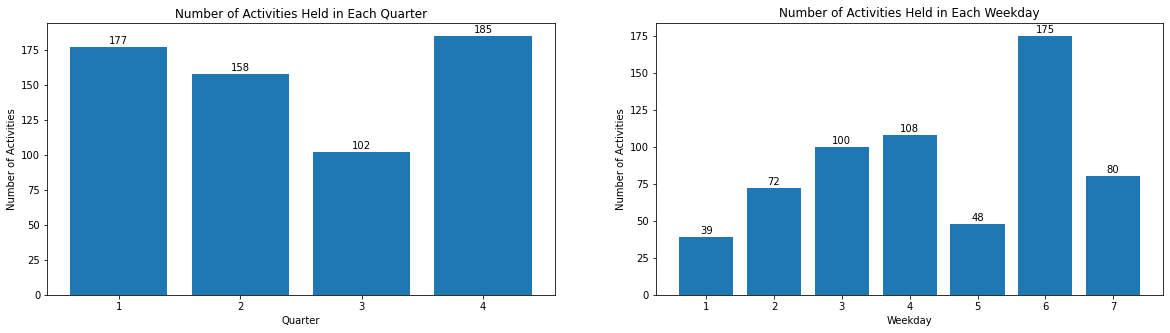

In [12]:
# 4.3 Initial Observation for "Event Date"
# 4.3.1 From Quarters' Perspective
# 4.3.1.1 Create Quarter Code for Event Date by Quarter
quarterList = []
for i in dataAlumni["Event Date"]:
    month = i.month
    if month == 1 or month == 2 or month == 3:
       quarterList.append(1)
    elif month == 4 or month == 5 or month == 6:
       quarterList.append(2)
    elif month == 7 or month == 8 or month == 9:
       quarterList.append(3)
    elif month == 10 or month == 11 or month == 12:
       quarterList.append(4)
dataAlumni["Quarter"] = quarterList

# 4.3.1.2 Show the Number of Activities Held in Each Quarter by Bar Chart
plt.figure(figsize=(20,5))
quarterCount = dataAlumni.groupby("Quarter",as_index=False)["Event Name"].count()
quarterCount.columns=["Quarter","Number of Activities"]
plt.subplot(121)
plt.bar(x=quarterCount["Quarter"],height=quarterCount["Number of Activities"],)
plt.xticks(range(1,5))
plt.xlabel("Quarter")
plt.ylabel("Number of Activities")
plt.title("Number of Activities Held in Each Quarter")

# Add Data Labels for Each Bar
for x,y in zip(quarterCount["Quarter"],quarterCount["Number of Activities"]):
    plt.text(x,y+1,str(y),fontsize=10,ha="center",va="bottom")
    

# 4.3.2 From Weekdays' Perspective
# 4.3.2.1 Create Weekday Variable for Each Row 
weekdayList=[]
for i in dataAlumni["Event Date"]:
    weekday=i.weekday()+1
    weekdayList.append(weekday)
dataAlumni["Weekday"] = weekdayList

# 4.3.2.2 Show the Number of Activities Held in Each Weekday.by Bar Chart
weekdayCount = dataAlumni.groupby("Weekday",as_index=False)["Event Name"].count()
weekdayCount.columns=["Weekday","Number of Activities"]
plt.subplot(122)
plt.bar(x=weekdayCount["Weekday"],height=weekdayCount["Number of Activities"],)
plt.xticks(range(1,8))
plt.xlabel("Weekday")
plt.ylabel("Number of Activities")
plt.title("Number of Activities Held in Each Weekday")

# Add Data Labels for Each Bar
for x,y in zip(weekdayCount["Weekday"],weekdayCount["Number of Activities"]):
    plt.text(x,y+1,str(y),fontsize=10,ha="center",va="bottom")

plt.show()

# Finding: (1) Q4 was when most activities were carried out during cumulative years
# (2) Most activities were carried out on Saturday, Wednesday, and Thursday

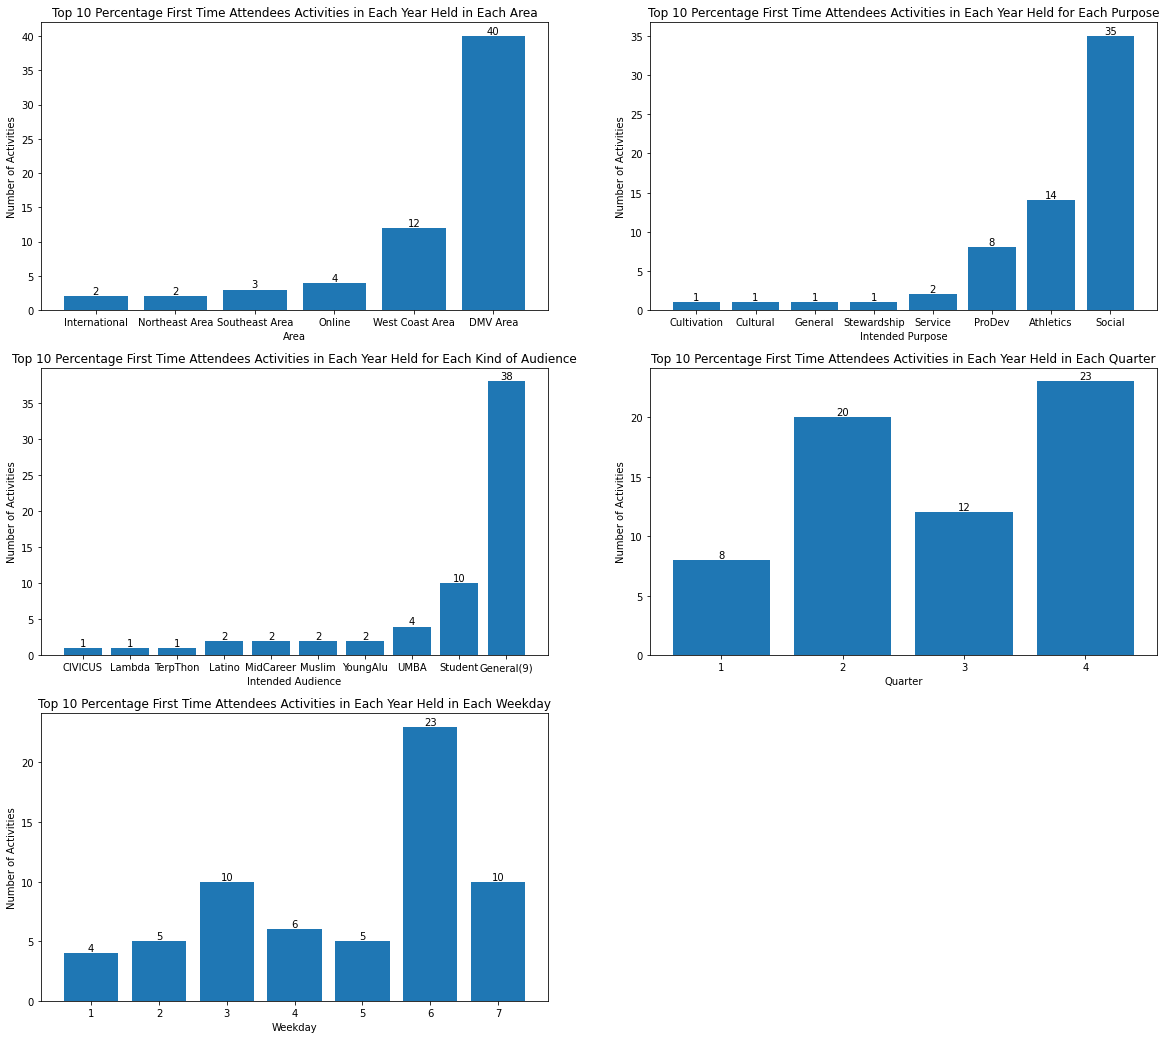

In [13]:
# Part Three: Preliminary Analysis to Explore the Factors Which Influence First Time Attendees

# Step 5: Using Boxplot, 3-means Clustering and Some Other Methods to Explore Which Factor Can Influence First Time Attendees.

# 5.1 Overview: Find Top 10 Percentage First Time Attendees Activities in Each Year, to See Their Location, Intended Purpose, Intended Audience, Event Date
# 5.1.1 Find Top 10 Percentage First Time Attendees Activities in Each Year, and Concatenate the Data
data2019 = dataAlumni.loc[dataAlumni["Year"]==2019]
data2018 = dataAlumni.loc[dataAlumni["Year"]==2018]
data2017 = dataAlumni.loc[dataAlumni["Year"]==2017]
data2016 = dataAlumni.loc[dataAlumni["Year"]==2016]
data2015 = dataAlumni.loc[dataAlumni["Year"]==2015]
data2014 = dataAlumni.loc[dataAlumni["Year"]==2014]
data2013 = dataAlumni.loc[dataAlumni["Year"]==2013]

sortedData2019 = data2019.sort_values(["Percentage First Time Attendees"],ascending=False)
sortedData2018 = data2018.sort_values(["Percentage First Time Attendees"],ascending=False)
sortedData2017 = data2017.sort_values(["Percentage First Time Attendees"],ascending=False)
sortedData2016 = data2016.sort_values(["Percentage First Time Attendees"],ascending=False)
sortedData2015 = data2015.sort_values(["Percentage First Time Attendees"],ascending=False)
sortedData2014 = data2014.sort_values(["Percentage First Time Attendees"],ascending=False)
sortedData2013 = data2013.sort_values(["Percentage First Time Attendees"],ascending=False)

top10 = pd.concat([sortedData2019.head(10),sortedData2018.head(10),sortedData2017.head(10),sortedData2016.head(10),sortedData2015.head(10),sortedData2014.head(10),sortedData2013.head(10)])

# 5.1.2 Top 10 Percentage First Time Attendees Activities in Each Year Held in Each Area
plt.figure(figsize=(20,18))
areaTop10 = top10.groupby(["Area"],as_index=False)["Event Name"].count()
areaTop10.columns=["Area", "Number of Activities"]
areaTop10 = areaTop10.sort_values(["Number of Activities"])

plt.subplot(321)
plt.bar(x=areaTop10["Area"],height=areaTop10["Number of Activities"])
plt.xlabel("Area")
plt.ylabel("Number of Activities")
plt.title("Top 10 Percentage First Time Attendees Activities in Each Year Held in Each Area")

for x,y in zip(areaTop10["Area"],areaTop10["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 5.1.3 Top 10 Percentage First Time Attendees Activities in Each Year Held for Each Purpose
purposeTop10 = top10.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeTop10.columns=["Purpose", "Number of Activities"]
purposeTop10 = purposeTop10.sort_values(["Number of Activities"])

plt.subplot(322)
plt.bar(x=purposeTop10["Purpose"],height=purposeTop10["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Top 10 Percentage First Time Attendees Activities in Each Year Held for Each Purpose")

for x,y in zip(purposeTop10["Purpose"],purposeTop10["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 5.1.4 Top 10 Percentage First Time Attendees Activities in Each Year Held for Each Kind of Audience
audienceTop10 = top10.groupby(["Audience"],as_index=False)["Event Name"].count()
audienceTop10.columns=["Audience", "Number of Activities"]
audienceTop10 = audienceTop10.sort_values(["Number of Activities"])

plt.subplot(323)
plt.bar(x=audienceTop10["Audience"],height=audienceTop10["Number of Activities"])
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Top 10 Percentage First Time Attendees Activities in Each Year Held for Each Kind of Audience")

for x,y in zip(audienceTop10["Audience"],audienceTop10["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

    
# 5.1.5 Top 10 Percentage First Time Attendees Activities in Each Year Held in Each Quarter
quarterTop10 = top10.groupby(["Quarter"],as_index=False)["Event Name"].count()
quarterTop10.columns=["Quarter", "Number of Activities"]

plt.subplot(324)
plt.bar(x=quarterTop10["Quarter"],height=quarterTop10["Number of Activities"])
plt.xlabel("Quarter")
plt.ylabel("Number of Activities")
plt.xticks(range(1,5,1))
plt.title("Top 10 Percentage First Time Attendees Activities in Each Year Held in Each Quarter")

for x,y in zip(quarterTop10["Quarter"],quarterTop10["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 5.1.6 Top 10 Percentage First Time Attendees Activities in Each Year Held in Each Weekday 
weekdayTop10 = top10.groupby(["Weekday"],as_index=False)["Event Name"].count()
weekdayTop10.columns=["Weekday", "Number of Activities"]

plt.subplot(325)
plt.bar(x=weekdayTop10["Weekday"],height=weekdayTop10["Number of Activities"])
plt.xlabel("Weekday")
plt.ylabel("Number of Activities")
plt.xticks(range(1,8,1))
plt.title("Top 10 Percentage First Time Attendees Activities in Each Year Held in Each Weekday")

for x,y in zip(weekdayTop10["Weekday"],weekdayTop10["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

plt.show()

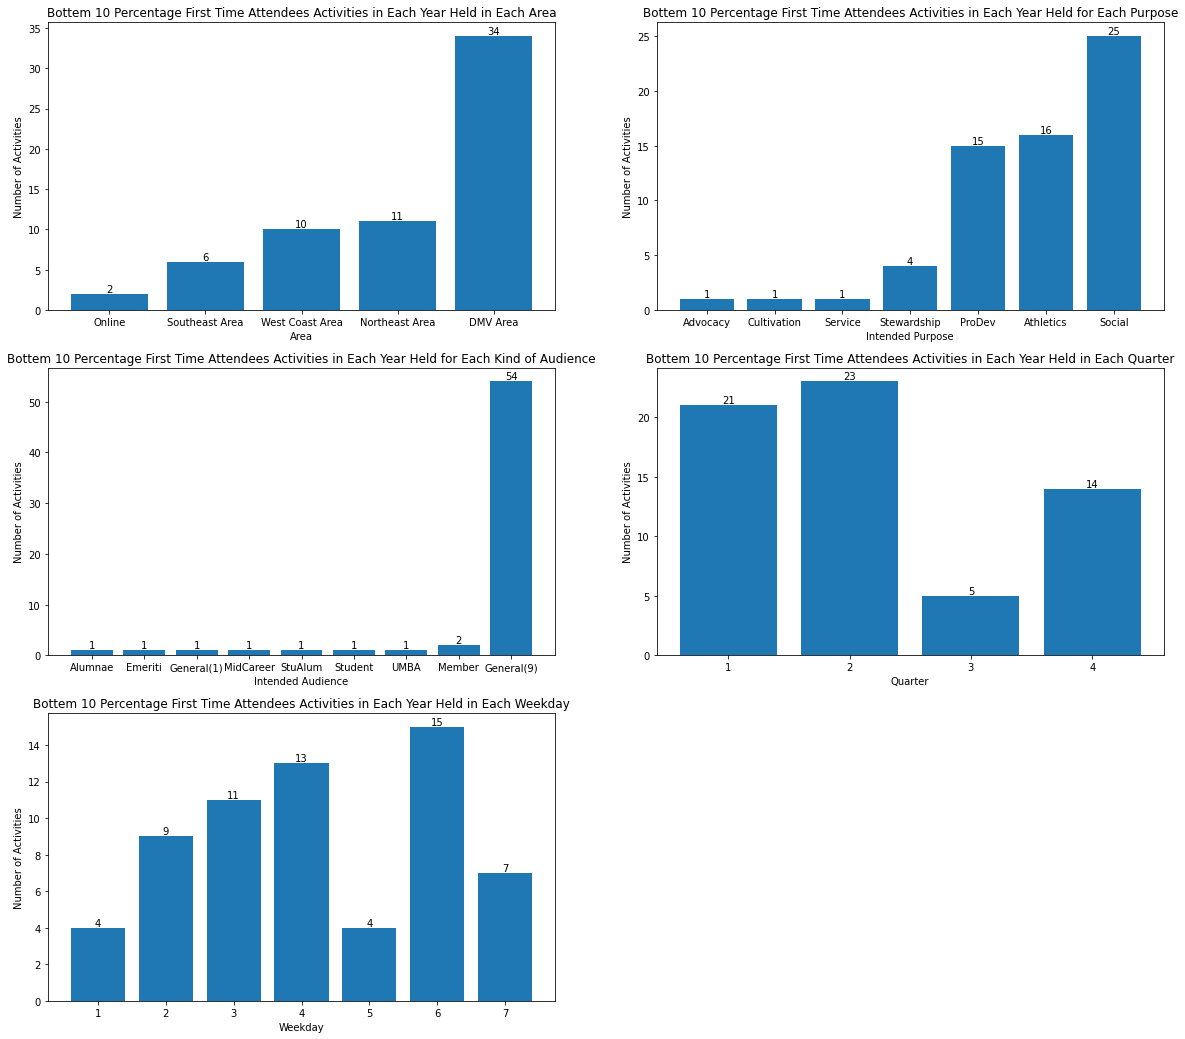

In [14]:
# 5.2 Overview: Find Bottom 10 Percentage First Time Attendees Activities in Each Year, to See Their Location, Intended Purpose, Intended Audience, Event Date
# 5.2.1 Concatenate the Bottem 10 Percentage First Time Attendees Activities in Each Year
bottom10 = pd.concat([sortedData2019.tail(10),sortedData2018.tail(10),sortedData2017.tail(10),sortedData2016.tail(10),sortedData2015.tail(10),sortedData2014.tail(10),sortedData2013.tail(10)])

# 5.2.2 Bottem 10 Percentage First Time Attendees Activities in Each Year Held in Each Area
plt.figure(figsize=(20,18))
areaBottem10 = bottom10.groupby(["Area"],as_index=False)["Event Name"].count()
areaBottem10.columns=["Area", "Number of Activities"]
areaBottem10 = areaBottem10.sort_values(["Number of Activities"])

plt.subplot(321)
plt.bar(x=areaBottem10["Area"],height=areaBottem10["Number of Activities"])
plt.xlabel("Area")
plt.ylabel("Number of Activities")
plt.title("Bottem 10 Percentage First Time Attendees Activities in Each Year Held in Each Area")

for x,y in zip(areaBottem10["Area"],areaBottem10["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 5.2.3 Bottem 10 Percentage First Time Attendees Activities in Each Year Held for Each Purpose
purposeBottem10 = bottom10.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeBottem10.columns=["Purpose", "Number of Activities"]
purposeBottem10 = purposeBottem10.sort_values(["Number of Activities"])

plt.subplot(322)
plt.bar(x=purposeBottem10["Purpose"],height=purposeBottem10["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Bottem 10 Percentage First Time Attendees Activities in Each Year Held for Each Purpose")

for x,y in zip(purposeBottem10["Purpose"],purposeBottem10["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 5.2.4 Bottem 10 Percentage First Time Attendees Activities in Each Year Held for Each Kind of Audience
audienceBottem10 = bottom10.groupby(["Audience"],as_index=False)["Event Name"].count()
audienceBottem10.columns=["Audience", "Number of Activities"]
audienceBottem10 = audienceBottem10.sort_values(["Number of Activities"])

plt.subplot(323)
plt.bar(x=audienceBottem10["Audience"],height=audienceBottem10["Number of Activities"])
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Bottem 10 Percentage First Time Attendees Activities in Each Year Held for Each Kind of Audience")

for x,y in zip(audienceBottem10["Audience"],audienceBottem10["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 5.2.5 Bottem 10 Percentage First Time Attendees Activities in Each Year Held in Each Quarter
quarterBottem10 = bottom10.groupby(["Quarter"],as_index=False)["Event Name"].count()
quarterBottem10.columns=["Quarter", "Number of Activities"]

plt.subplot(324)
plt.bar(x=quarterBottem10["Quarter"],height=quarterBottem10["Number of Activities"])
plt.xlabel("Quarter")
plt.ylabel("Number of Activities")
plt.xticks(range(1,5,1))
plt.title("Bottem 10 Percentage First Time Attendees Activities in Each Year Held in Each Quarter")

for x,y in zip(quarterBottem10["Quarter"],quarterBottem10["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 5.2.6 Bottem 10 Percentage First Time Attendees Activities in Each Year Held in Each Weekday 
weekdayBottem10 = bottom10.groupby(["Weekday"],as_index=False)["Event Name"].count()
weekdayBottem10.columns=["Weekday", "Number of Activities"]

plt.subplot(325)
plt.bar(x=weekdayBottem10["Weekday"],height=weekdayBottem10["Number of Activities"])
plt.xlabel("Weekday")
plt.ylabel("Number of Activities")
plt.xticks(range(1,8,1))
plt.title("Bottem 10 Percentage First Time Attendees Activities in Each Year Held in Each Weekday")

for x,y in zip(weekdayBottem10["Weekday"],weekdayBottem10["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
             
plt.show()

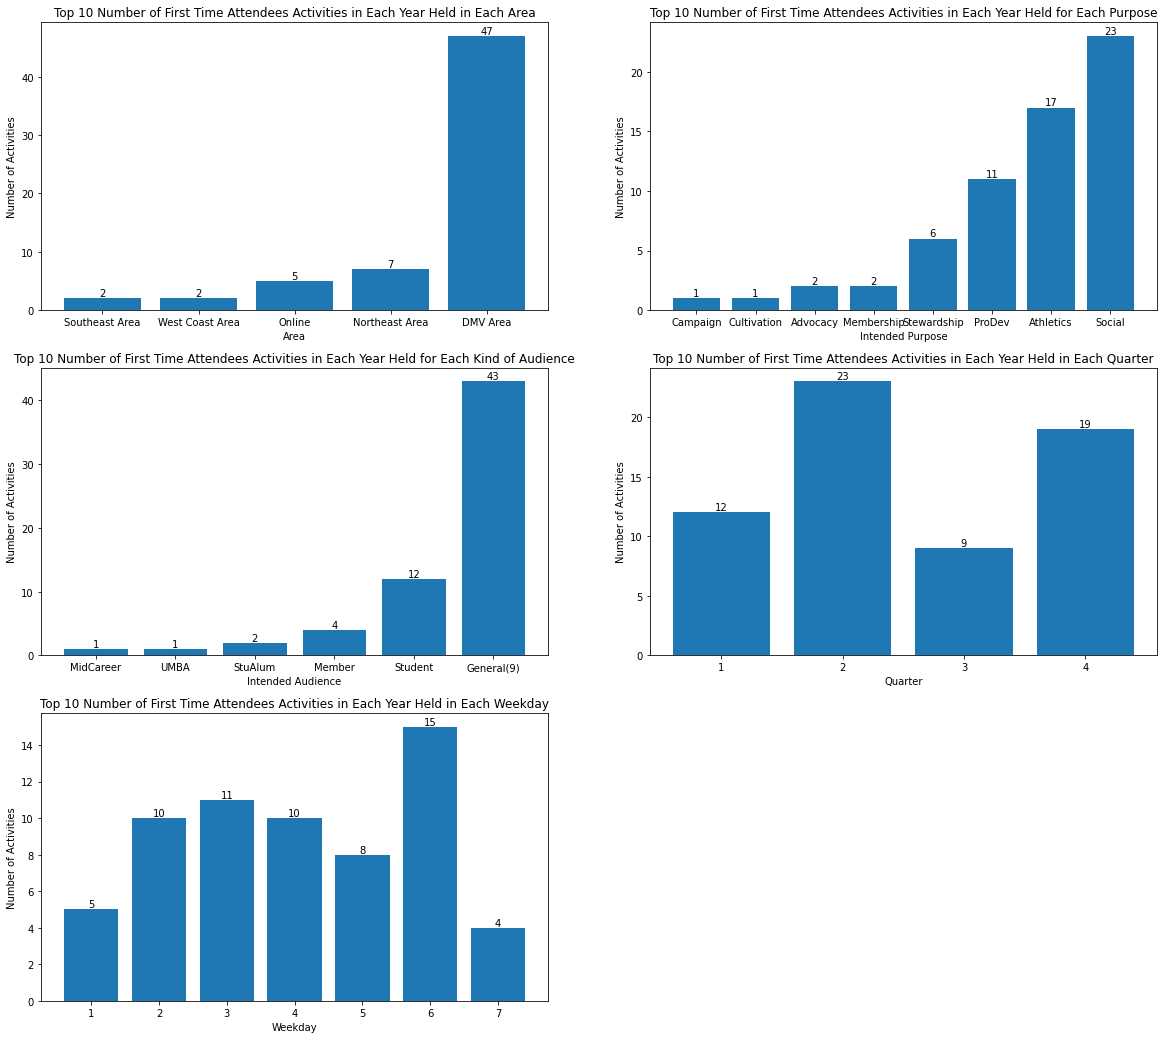

In [15]:
# 5.3 Overview: Find Top 10 Number of First Time Attendees Activities in Each Year, to See Their Location, Intended Purpose, Intended Audience, Event Date
# 5.3.1 Find Top 10 Number of First Time Attendees Activities in Each Year, and Concatenate the Data
sortedData2019_FTA = data2019.sort_values(["First Time Attendees"],ascending=False)
sortedData2018_FTA = data2018.sort_values(["First Time Attendees"],ascending=False)
sortedData2017_FTA = data2017.sort_values(["First Time Attendees"],ascending=False)
sortedData2016_FTA = data2016.sort_values(["First Time Attendees"],ascending=False)
sortedData2015_FTA = data2015.sort_values(["First Time Attendees"],ascending=False)
sortedData2014_FTA = data2014.sort_values(["First Time Attendees"],ascending=False)
sortedData2013_FTA = data2013.sort_values(["First Time Attendees"],ascending=False)

top10_FTA = pd.concat([sortedData2019_FTA.head(10),sortedData2018_FTA.head(10),sortedData2017_FTA.head(10),sortedData2016_FTA.head(10),sortedData2015_FTA.head(10),sortedData2014_FTA.head(10),sortedData2013_FTA.head(10)])

# 5.3.2 Top 10 Number of First Time Attendees Activities in Each Year Held in Each Area
plt.figure(figsize=(20,18))
areaTop10_FTA = top10_FTA.groupby(["Area"],as_index=False)["Event Name"].count()
areaTop10_FTA.columns=["Area", "Number of Activities"]
areaTop10_FTA = areaTop10_FTA.sort_values(["Number of Activities"])

plt.subplot(321)
plt.bar(x=areaTop10_FTA["Area"],height=areaTop10_FTA["Number of Activities"])
plt.xlabel("Area")
plt.ylabel("Number of Activities")
plt.title("Top 10 Number of First Time Attendees Activities in Each Year Held in Each Area")

for x,y in zip(areaTop10_FTA["Area"],areaTop10_FTA["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 5.3.3 Top 10 Number of First Time Attendees Activities in Each Year Held for Each Purpose
purposeTop10_FTA = top10_FTA.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeTop10_FTA.columns=["Purpose", "Number of Activities"]
purposeTop10_FTA = purposeTop10_FTA.sort_values(["Number of Activities"])

plt.subplot(322)
plt.bar(x=purposeTop10_FTA["Purpose"],height=purposeTop10_FTA["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Top 10 Number of First Time Attendees Activities in Each Year Held for Each Purpose")

for x,y in zip(purposeTop10_FTA["Purpose"],purposeTop10_FTA["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 5.3.4 Top 10 Number of First Time Attendees Activities in Each Year Held for Each Kind of Audience
audienceTop10_FTA = top10_FTA.groupby(["Audience"],as_index=False)["Event Name"].count()
audienceTop10_FTA.columns=["Audience", "Number of Activities"]
audienceTop10_FTA = audienceTop10_FTA.sort_values(["Number of Activities"])

plt.subplot(323)
plt.bar(x=audienceTop10_FTA["Audience"],height=audienceTop10_FTA["Number of Activities"])
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Top 10 Number of First Time Attendees Activities in Each Year Held for Each Kind of Audience")

for x,y in zip(audienceTop10_FTA["Audience"],audienceTop10_FTA["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 5.3.5 Top 10 Number of First Time Attendees Activities in Each Year Held in Each Quarter
quarterTop10_FTA = top10_FTA.groupby(["Quarter"],as_index=False)["Event Name"].count()
quarterTop10_FTA.columns=["Quarter", "Number of Activities"]

plt.subplot(324)
plt.bar(x=quarterTop10_FTA["Quarter"],height=quarterTop10_FTA["Number of Activities"])
plt.xlabel("Quarter")
plt.ylabel("Number of Activities")
plt.xticks(range(1,5,1))
plt.title("Top 10 Number of First Time Attendees Activities in Each Year Held in Each Quarter")

for x,y in zip(quarterTop10_FTA["Quarter"],quarterTop10_FTA["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 5.3.6 Top 10 Number of First Time Attendees Activities in Each Year Held in Each Weekday 
weekdayTop10_FTA = top10_FTA.groupby(["Weekday"],as_index=False)["Event Name"].count()
weekdayTop10_FTA.columns=["Weekday", "Number of Activities"]

plt.subplot(325)
plt.bar(x=weekdayTop10_FTA["Weekday"],height=weekdayTop10_FTA["Number of Activities"])
plt.xlabel("Weekday")
plt.ylabel("Number of Activities")
plt.xticks(range(1,8,1))
plt.title("Top 10 Number of First Time Attendees Activities in Each Year Held in Each Weekday")

for x,y in zip(weekdayTop10_FTA["Weekday"],weekdayTop10_FTA["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

plt.show()

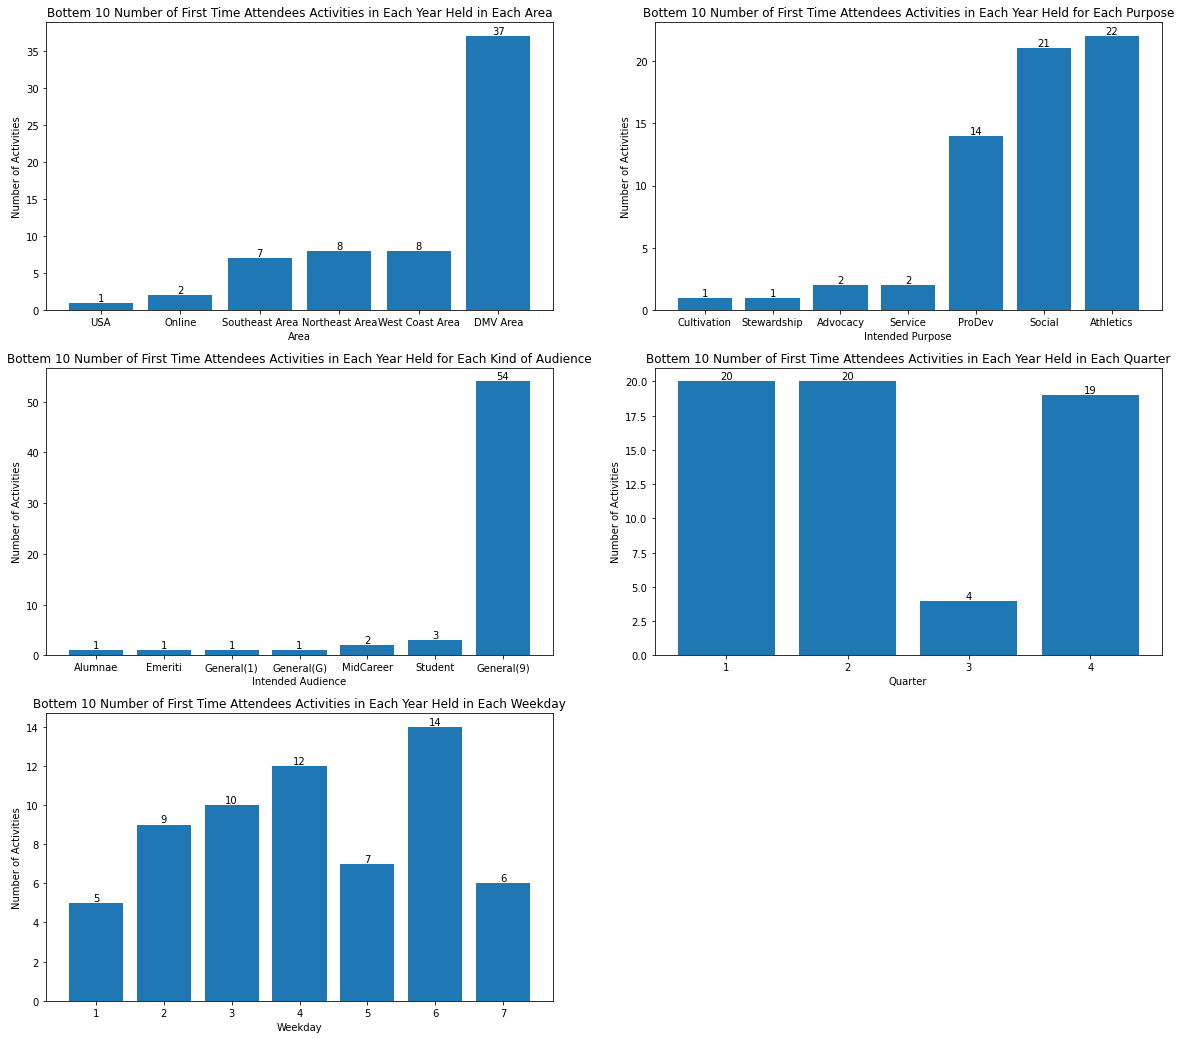

In [16]:
# 5.4 Overview: Find Bottom 10 Number of First Time Attendees Activities in Each Year, to See Their Location, Intended Purpose, Intended Audience, Event Date
# 5.4.1 Concatenate the Bottem 10 Number of First Time Attendees Activities in Each Year
bottom10_FTA = pd.concat([sortedData2019_FTA.tail(10),sortedData2018_FTA.tail(10),sortedData2017_FTA.tail(10),sortedData2016_FTA.tail(10),sortedData2015_FTA.tail(10),sortedData2014_FTA.tail(10),sortedData2013_FTA.tail(10)])

# 5.2.2 Bottem 10 Percentage First Time Attendees Activities in Each Year Held in Each Area
plt.figure(figsize=(20,18))
areaBottem10_FTA = bottom10_FTA.groupby(["Area"],as_index=False)["Event Name"].count()
areaBottem10_FTA.columns=["Area", "Number of Activities"]
areaBottem10_FTA = areaBottem10_FTA.sort_values(["Number of Activities"])

plt.subplot(321)
plt.bar(x=areaBottem10_FTA["Area"],height=areaBottem10_FTA["Number of Activities"])
plt.xlabel("Area")
plt.ylabel("Number of Activities")
plt.title("Bottem 10 Number of First Time Attendees Activities in Each Year Held in Each Area")

for x,y in zip(areaBottem10_FTA["Area"],areaBottem10_FTA["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 5.2.3 Bottem 10 Number of First Time Attendees Activities in Each Year Held for Each Purpose
purposeBottem10_FTA = bottom10_FTA.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeBottem10_FTA.columns=["Purpose", "Number of Activities"]
purposeBottem10_FTA = purposeBottem10_FTA.sort_values(["Number of Activities"])

plt.subplot(322)
plt.bar(x=purposeBottem10_FTA["Purpose"],height=purposeBottem10_FTA["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Bottem 10 Number of First Time Attendees Activities in Each Year Held for Each Purpose")

for x,y in zip(purposeBottem10_FTA["Purpose"],purposeBottem10_FTA["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 5.2.4 Bottem 10 Number of First Time Attendees Activities in Each Year Held for Each Kind of Audience
audienceBottem10_FTA = bottom10_FTA.groupby(["Audience"],as_index=False)["Event Name"].count()
audienceBottem10_FTA.columns=["Audience", "Number of Activities"]
audienceBottem10_FTA = audienceBottem10_FTA.sort_values(["Number of Activities"])

plt.subplot(323)
plt.bar(x=audienceBottem10_FTA["Audience"],height=audienceBottem10_FTA["Number of Activities"])
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Bottem 10 Number of First Time Attendees Activities in Each Year Held for Each Kind of Audience")

for x,y in zip(audienceBottem10_FTA["Audience"],audienceBottem10_FTA["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 5.2.5 Bottem 10 Number of First Time Attendees Activities in Each Year Held in Each Quarter
quarterBottem10_FTA = bottom10_FTA.groupby(["Quarter"],as_index=False)["Event Name"].count()
quarterBottem10_FTA.columns=["Quarter", "Number of Activities"]

plt.subplot(324)
plt.bar(x=quarterBottem10_FTA["Quarter"],height=quarterBottem10_FTA["Number of Activities"])
plt.xlabel("Quarter")
plt.ylabel("Number of Activities")
plt.xticks(range(1,5,1))
plt.title("Bottem 10 Number of First Time Attendees Activities in Each Year Held in Each Quarter")

for x,y in zip(quarterBottem10_FTA["Quarter"],quarterBottem10_FTA["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 5.2.6 Bottem 10 Number of First Time Attendees Activities in Each Year Held in Each Weekday 
weekdayBottem10_FTA = bottom10_FTA.groupby(["Weekday"],as_index=False)["Event Name"].count()
weekdayBottem10_FTA.columns=["Weekday", "Number of Activities"]

plt.subplot(325)
plt.bar(x=weekdayBottem10_FTA["Weekday"],height=weekdayBottem10_FTA["Number of Activities"])
plt.xlabel("Weekday")
plt.ylabel("Number of Activities")
plt.xticks(range(1,8,1))
plt.title("Bottem 10 Number of First Time Attendees Activities in Each Year Held in Each Weekday")

for x,y in zip(weekdayBottem10_FTA["Weekday"],weekdayBottem10_FTA["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

plt.show()

In [17]:
# We cannot draw exact conclusion by choosing TOP 10 Percentage First Time Attendees or number of First Time Attendees to see their locations, intended purpose, etc.
# For example, it shows among TOP 10 Percentage First Time Attendees activities, most of them were held in DMV area. 
# But we cannot conclude that holding activities in DMV area can attract more first time attendees, because when we choose Bottom 10 Percentage First Time Attendees activities, most of them were also held in DMV area. 
# So we use another method -- boxplot, to show the difference of Percentage First Time Attendees or number of First Time Attendees within different factors.

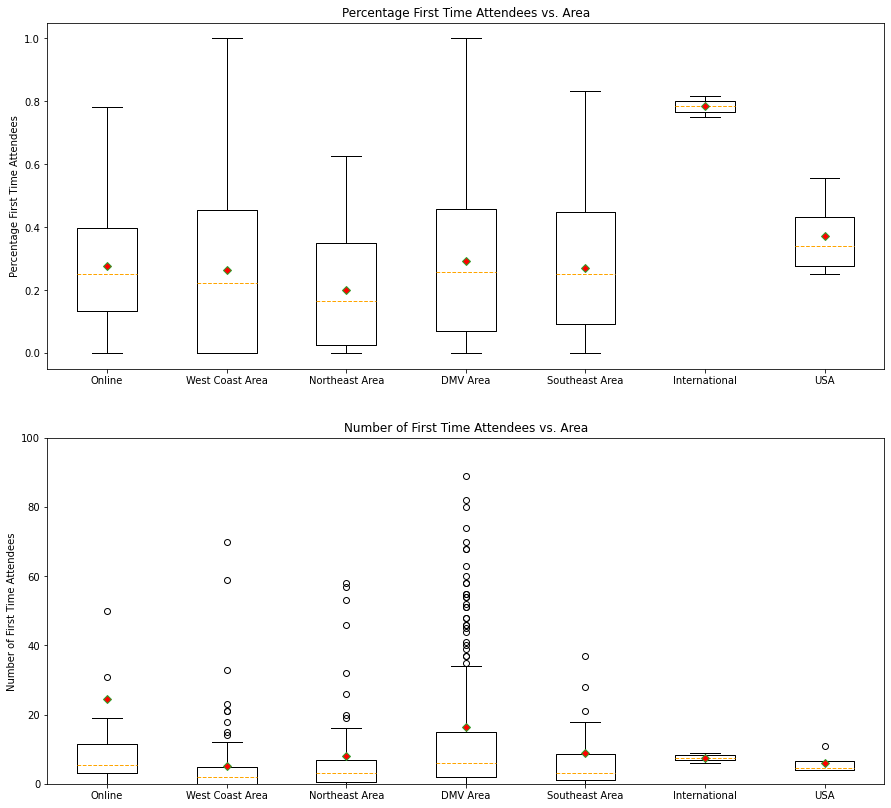

In [18]:
# 5.5 "Location" Variable
# 5.5.1 Show Boxplot for Percentage First Time Attendees in Each Area.
plt.figure(figsize=(15,14))
plt.subplot(211)
areaBox1 = dataAlumni.loc[dataAlumni["Area"]=="Online","Percentage First Time Attendees"]
areaBox2 = dataAlumni.loc[dataAlumni["Area"]=="West Coast Area","Percentage First Time Attendees"]
areaBox3 = dataAlumni.loc[dataAlumni["Area"]=="Northeast Area","Percentage First Time Attendees"]
areaBox4 = dataAlumni.loc[dataAlumni["Area"]=="DMV Area","Percentage First Time Attendees"]
areaBox5 = dataAlumni.loc[dataAlumni["Area"]=="Southeast Area","Percentage First Time Attendees"]
areaBox6 = dataAlumni.loc[dataAlumni["Area"]=="International","Percentage First Time Attendees"]
areaBox7 = dataAlumni.loc[dataAlumni["Area"]=="USA","Percentage First Time Attendees"]
areaName = ["Online","West Coast Area","Northeast Area","DMV Area","Southeast Area","International","USA"]
plt.boxplot([areaBox1,areaBox2,areaBox3,areaBox4,areaBox5,areaBox6,areaBox7],labels=areaName,showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.ylabel("Percentage First Time Attendees")
plt.title("Percentage First Time Attendees vs. Area")

# 5.5.2 Show Boxplot for Number of First Time Attendees in Each Area.
plt.subplot(212)
areaBox8 = dataAlumni.loc[dataAlumni["Area"]=="Online","First Time Attendees"]
areaBox9 = dataAlumni.loc[dataAlumni["Area"]=="West Coast Area","First Time Attendees"]
areaBox10 = dataAlumni.loc[dataAlumni["Area"]=="Northeast Area","First Time Attendees"]
areaBox11 = dataAlumni.loc[dataAlumni["Area"]=="DMV Area","First Time Attendees"]
areaBox12 = dataAlumni.loc[dataAlumni["Area"]=="Southeast Area","First Time Attendees"]
areaBox13 = dataAlumni.loc[dataAlumni["Area"]=="International","First Time Attendees"]
areaBox14 = dataAlumni.loc[dataAlumni["Area"]=="USA","First Time Attendees"]
plt.boxplot([areaBox8,areaBox9,areaBox10,areaBox11,areaBox12,areaBox13,areaBox14],labels=areaName, showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.ylim(0,100)
plt.ylabel("Number of First Time Attendees")
plt.title("Number of First Time Attendees vs. Area")
plt.savefig('FirstTimeAttendees_Location.png') 
plt.show()

# Findings:(1) Mean and median does not change much among other areas when we look at Percentage of First Time Attendees, except International with a much higher median and mean.
# (2) For number of First Time Attendees, DMV area and Online have a much higher mean → outliers, but different area still have similar the median.

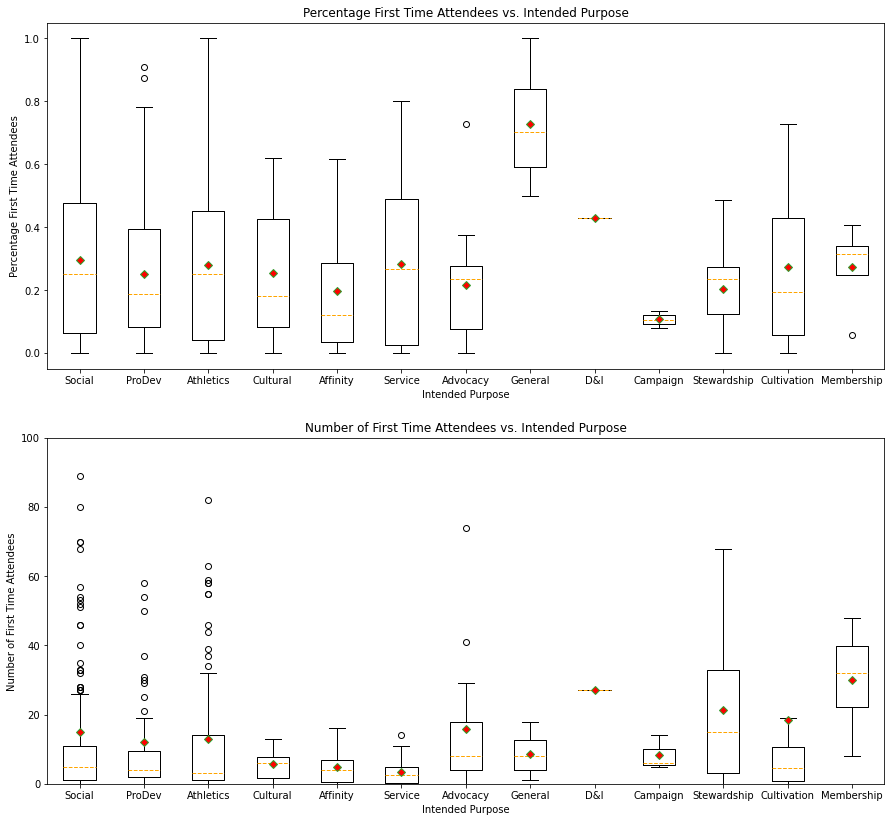

In [19]:
# 5.6 "Group" Variable
# 5.6.1 Show Boxplot for Percentage First Time Attendees for Each Intended Purpose
plt.figure(figsize=(15,14))
plt.subplot(211)
purposeBox1 = dataAlumni.loc[dataAlumni["Purpose"]=="Social","Percentage First Time Attendees"]
purposeBox2 = dataAlumni.loc[dataAlumni["Purpose"]=="ProDev","Percentage First Time Attendees"]
purposeBox3 = dataAlumni.loc[dataAlumni["Purpose"]=="Athletics","Percentage First Time Attendees"]
purposeBox4 = dataAlumni.loc[dataAlumni["Purpose"]=="Cultural","Percentage First Time Attendees"]
purposeBox5 = dataAlumni.loc[dataAlumni["Purpose"]=="Affinity","Percentage First Time Attendees"]
purposeBox6 = dataAlumni.loc[dataAlumni["Purpose"]=="Service","Percentage First Time Attendees"]
purposeBox7 = dataAlumni.loc[dataAlumni["Purpose"]=="Advocacy","Percentage First Time Attendees"]
purposeBox8 = dataAlumni.loc[dataAlumni["Purpose"]=="General","Percentage First Time Attendees"]
purposeBox9 = dataAlumni.loc[dataAlumni["Purpose"]=="D&I","Percentage First Time Attendees"]
purposeBox10 = dataAlumni.loc[dataAlumni["Purpose"]=="Campaign","Percentage First Time Attendees"]
purposeBox11 = dataAlumni.loc[dataAlumni["Purpose"]=="Stewardship","Percentage First Time Attendees"]
purposeBox12 = dataAlumni.loc[dataAlumni["Purpose"]=="Cultivation","Percentage First Time Attendees"]
purposeBox13 = dataAlumni.loc[dataAlumni["Purpose"]=="Membership","Percentage First Time Attendees"]
plt.boxplot([purposeBox1,purposeBox2,purposeBox3,purposeBox4,purposeBox5,purposeBox6,purposeBox7,purposeBox8,purposeBox9,purposeBox10,purposeBox11,purposeBox12,purposeBox13],labels=['Social','ProDev','Athletics','Cultural','Affinity','Service','Advocacy','General','D&I','Campaign','Stewardship','Cultivation','Membership'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Intended Purpose")
plt.ylabel("Percentage First Time Attendees")
plt.title("Percentage First Time Attendees vs. Intended Purpose")

# 5.6.2 Show Boxplot for Number of First Time Attendees for Each Intended Purpose
plt.subplot(212)
purposeBox14 = dataAlumni.loc[dataAlumni["Purpose"]=="Social","First Time Attendees"]
purposeBox15 = dataAlumni.loc[dataAlumni["Purpose"]=="ProDev","First Time Attendees"]
purposeBox16 = dataAlumni.loc[dataAlumni["Purpose"]=="Athletics","First Time Attendees"]
purposeBox17 = dataAlumni.loc[dataAlumni["Purpose"]=="Cultural","First Time Attendees"]
purposeBox18 = dataAlumni.loc[dataAlumni["Purpose"]=="Affinity","First Time Attendees"]
purposeBox19 = dataAlumni.loc[dataAlumni["Purpose"]=="Service","First Time Attendees"]
purposeBox20 = dataAlumni.loc[dataAlumni["Purpose"]=="Advocacy","First Time Attendees"]
purposeBox21 = dataAlumni.loc[dataAlumni["Purpose"]=="General","First Time Attendees"]
purposeBox22 = dataAlumni.loc[dataAlumni["Purpose"]=="D&I","First Time Attendees"]
purposeBox23 = dataAlumni.loc[dataAlumni["Purpose"]=="Campaign","First Time Attendees"]
purposeBox24 = dataAlumni.loc[dataAlumni["Purpose"]=="Stewardship","First Time Attendees"]
purposeBox25 = dataAlumni.loc[dataAlumni["Purpose"]=="Cultivation","First Time Attendees"]
purposeBox26 = dataAlumni.loc[dataAlumni["Purpose"]=="Membership","First Time Attendees"]
plt.boxplot([purposeBox14,purposeBox15,purposeBox16,purposeBox17,purposeBox18,purposeBox19,purposeBox20,purposeBox21,purposeBox22,purposeBox23,purposeBox24,purposeBox25,purposeBox26],labels=['Social','ProDev','Athletics','Cultural','Affinity','Service','Advocacy','General','D&I','Campaign','Stewardship','Cultivation','Membership'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Intended Purpose")
plt.ylabel("Number of First Time Attendees")
plt.ylim(0,100)
plt.title("Number of First Time Attendees vs. Intended Purpose")

plt.show()

# Finding: (1) "General" Purpose obviously has higher mean and median of Percentage First Time Attendees.
# (2) "Membership" Purpose relatively has higher mean and median of number of First Time Attendees.

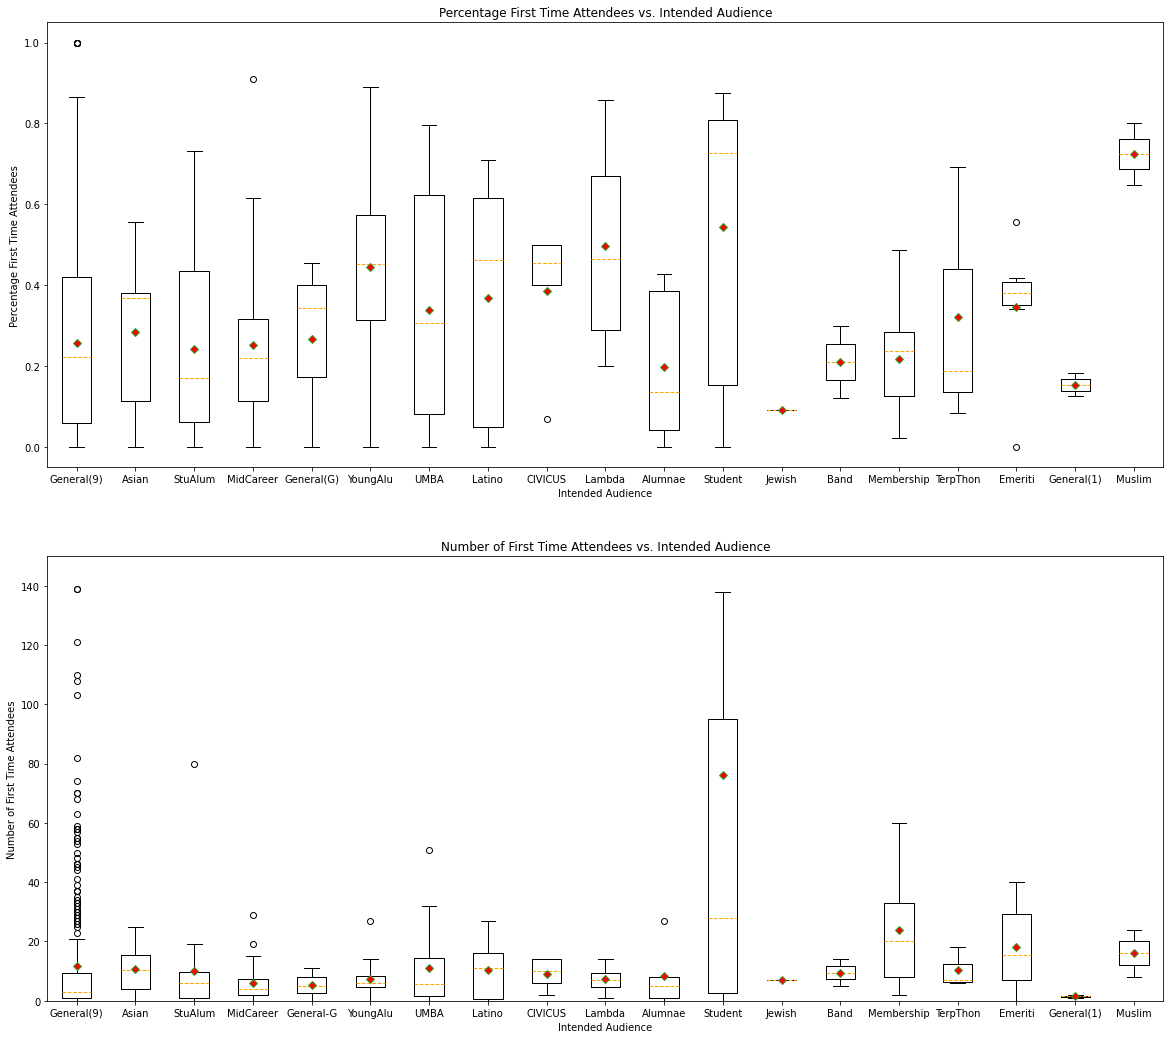

In [20]:
# 5.6.3 Show Boxplot for Percentage First Time Attendees for Each Intended Audience
plt.figure(figsize=(20,18))
plt.subplot(211)
audienceBox1 = dataAlumni.loc[dataAlumni["Audience"]=="General(9)","Percentage First Time Attendees"]
audienceBox2 = dataAlumni.loc[dataAlumni["Audience"]=="Asian","Percentage First Time Attendees"]
audienceBox3 = dataAlumni.loc[dataAlumni["Audience"]=="StuAlum","Percentage First Time Attendees"]
audienceBox4 = dataAlumni.loc[dataAlumni["Audience"]=="MidCareer","Percentage First Time Attendees"]
audienceBox5 = dataAlumni.loc[dataAlumni["Audience"]=="General(G)","Percentage First Time Attendees"]
audienceBox6 = dataAlumni.loc[dataAlumni["Audience"]=="YoungAlu","Percentage First Time Attendees"]
audienceBox7 = dataAlumni.loc[dataAlumni["Audience"]=="UMBA","Percentage First Time Attendees"]
audienceBox8 = dataAlumni.loc[dataAlumni["Audience"]=="Latino","Percentage First Time Attendees"]
audienceBox9 = dataAlumni.loc[dataAlumni["Audience"]=="CIVICUS","Percentage First Time Attendees"]
audienceBox10 = dataAlumni.loc[dataAlumni["Audience"]=="Lambda","Percentage First Time Attendees"]
audienceBox11 = dataAlumni.loc[dataAlumni["Audience"]=="Alumnae","Percentage First Time Attendees"]
audienceBox12 = dataAlumni.loc[dataAlumni["Audience"]=="Student","Percentage First Time Attendees"]
audienceBox13 = dataAlumni.loc[dataAlumni["Audience"]=="Jewish","Percentage First Time Attendees"]
audienceBox14 = dataAlumni.loc[dataAlumni["Audience"]=="Band","Percentage First Time Attendees"]
audienceBox15 = dataAlumni.loc[dataAlumni["Audience"]=="Member","Percentage First Time Attendees"]
audienceBox16 = dataAlumni.loc[dataAlumni["Audience"]=="TerpThon","Percentage First Time Attendees"]
audienceBox17 = dataAlumni.loc[dataAlumni["Audience"]=="Emeriti","Percentage First Time Attendees"]
audienceBox18 = dataAlumni.loc[dataAlumni["Audience"]=="General(1)","Percentage First Time Attendees"]
audienceBox19 = dataAlumni.loc[dataAlumni["Audience"]=="Muslim","Percentage First Time Attendees"]
plt.boxplot([audienceBox1,audienceBox2,audienceBox3,audienceBox4,audienceBox5,audienceBox6,audienceBox7,audienceBox8,audienceBox9,audienceBox10,audienceBox11,audienceBox12,audienceBox13,audienceBox14,audienceBox15,audienceBox16,audienceBox17,audienceBox18,audienceBox19],labels=['General(9)','Asian','StuAlum','MidCareer','General(G)','YoungAlu','UMBA','Latino','CIVICUS','Lambda','Alumnae','Student','Jewish','Band','Membership','TerpThon','Emeriti','General(1)','Muslim'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Intended Audience")
plt.ylabel("Percentage First Time Attendees")
plt.title("Percentage First Time Attendees vs. Intended Audience")

# 5.6.3 Show Boxplot for Number of First Time Attendees for Each Intended Audience
plt.subplot(212)
audienceBox20 = dataAlumni.loc[dataAlumni["Audience"]=="General(9)","First Time Attendees"]
audienceBox21 = dataAlumni.loc[dataAlumni["Audience"]=="Asian","First Time Attendees"]
audienceBox22 = dataAlumni.loc[dataAlumni["Audience"]=="StuAlum","First Time Attendees"]
audienceBox23 = dataAlumni.loc[dataAlumni["Audience"]=="MidCareer","First Time Attendees"]
audienceBox24 = dataAlumni.loc[dataAlumni["Audience"]=="General(G)","First Time Attendees"]
audienceBox25 = dataAlumni.loc[dataAlumni["Audience"]=="YoungAlu","First Time Attendees"]
audienceBox26 = dataAlumni.loc[dataAlumni["Audience"]=="UMBA","First Time Attendees"]
audienceBox27 = dataAlumni.loc[dataAlumni["Audience"]=="Latino","First Time Attendees"]
audienceBox28 = dataAlumni.loc[dataAlumni["Audience"]=="CIVICUS","First Time Attendees"]
audienceBox29 = dataAlumni.loc[dataAlumni["Audience"]=="Lambda","First Time Attendees"]
audienceBox30 = dataAlumni.loc[dataAlumni["Audience"]=="Alumnae","First Time Attendees"]
audienceBox31 = dataAlumni.loc[dataAlumni["Audience"]=="Student","First Time Attendees"]
audienceBox32 = dataAlumni.loc[dataAlumni["Audience"]=="Jewish","First Time Attendees"]
audienceBox33 = dataAlumni.loc[dataAlumni["Audience"]=="Band","First Time Attendees"]
audienceBox34 = dataAlumni.loc[dataAlumni["Audience"]=="Member","First Time Attendees"]
audienceBox35 = dataAlumni.loc[dataAlumni["Audience"]=="TerpThon","First Time Attendees"]
audienceBox36 = dataAlumni.loc[dataAlumni["Audience"]=="Emeriti","First Time Attendees"]
audienceBox37 = dataAlumni.loc[dataAlumni["Audience"]=="General(1)","First Time Attendees"]
audienceBox38 = dataAlumni.loc[dataAlumni["Audience"]=="Muslim","First Time Attendees"]
plt.boxplot([audienceBox20,audienceBox21,audienceBox22,audienceBox23,audienceBox24,audienceBox25,audienceBox26,audienceBox27,audienceBox28,audienceBox29,audienceBox30,audienceBox31,audienceBox32,audienceBox33,audienceBox34,audienceBox35,audienceBox36,audienceBox37,audienceBox38],labels=['General(9)','Asian','StuAlum','MidCareer','General-G','YoungAlu','UMBA','Latino','CIVICUS','Lambda','Alumnae','Student','Jewish','Band','Membership','TerpThon','Emeriti','General(1)','Muslim'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Intended Audience")
plt.ylabel("Number of First Time Attendees")
plt.ylim(0,150)
plt.title("Number of First Time Attendees vs. Intended Audience")

plt.show()

# Findings: (1) "Muslim" Audience obviously has higher mean and median of Percentage First Time Attendees.
# (2) "Student" Audience obviously has higher median of Percentage First Time Attendees and relatively has a higher mean of Percentage First Time Attendees.
# (3) "Student" Audience obviously has higher mean of number of First Time Attendees. And it also has the highest median of number of First Time Attendees.

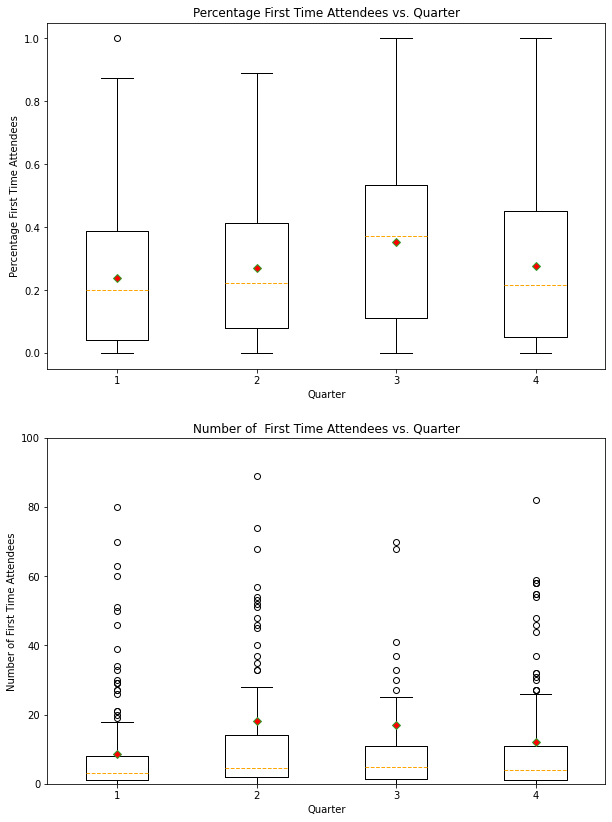

In [21]:
# 5.7 "Event Date" Variable
# 5.7.1 Show Boxplot for Percentage First Time Attendees in Each Quarter
plt.figure(figsize=(10,14))
plt.subplot(211)
quarterBox1 = dataAlumni.loc[dataAlumni["Quarter"]==1,"Percentage First Time Attendees"]
quarterBox2 = dataAlumni.loc[dataAlumni["Quarter"]==2,"Percentage First Time Attendees"]
quarterBox3 = dataAlumni.loc[dataAlumni["Quarter"]==3,"Percentage First Time Attendees"]
quarterBox4 = dataAlumni.loc[dataAlumni["Quarter"]==4,"Percentage First Time Attendees"]
plt.boxplot([quarterBox1,quarterBox2,quarterBox3,quarterBox4],labels=['1','2','3','4'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Quarter")
plt.ylabel("Percentage First Time Attendees")
plt.title("Percentage First Time Attendees vs. Quarter")

# 5.7.2 Show Boxplot for Number of First Time Attendees in Each Quarter
plt.subplot(212)
quarterBox5 = dataAlumni.loc[dataAlumni["Quarter"]==1,"First Time Attendees"]
quarterBox6 = dataAlumni.loc[dataAlumni["Quarter"]==2,"First Time Attendees"]
quarterBox7 = dataAlumni.loc[dataAlumni["Quarter"]==3,"First Time Attendees"]
quarterBox8 = dataAlumni.loc[dataAlumni["Quarter"]==4,"First Time Attendees"]
plt.boxplot([quarterBox5,quarterBox6,quarterBox7,quarterBox8],labels=['1','2','3','4'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Quarter")
plt.ylabel("Number of First Time Attendees")
plt.ylim(0,100)
plt.title("Number of  First Time Attendees vs. Quarter")

plt.show()

# Finding: (1) Percentage First time attendees mean and median for Q3 is highest (Jul-Sep).

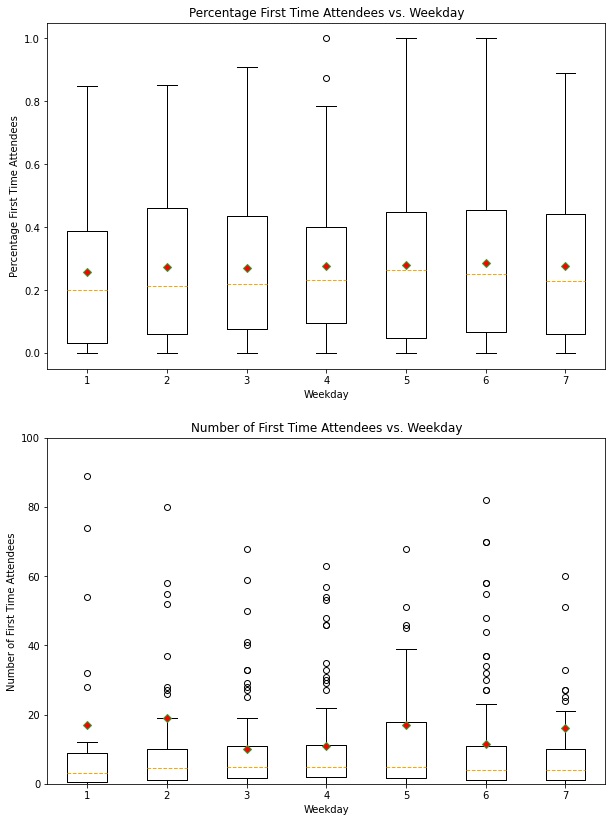

In [22]:
# 5.7.3 Show Boxplot for Percentage First Time Attendees in Each Weekday
plt.figure(figsize=(10,14))
plt.subplot(211)
weekdayBox1 = dataAlumni.loc[dataAlumni["Weekday"]==1,"Percentage First Time Attendees"]
weekdayBox2 = dataAlumni.loc[dataAlumni["Weekday"]==2,"Percentage First Time Attendees"]
weekdayBox3 = dataAlumni.loc[dataAlumni["Weekday"]==3,"Percentage First Time Attendees"]
weekdayBox4 = dataAlumni.loc[dataAlumni["Weekday"]==4,"Percentage First Time Attendees"]
weekdayBox5 = dataAlumni.loc[dataAlumni["Weekday"]==5,"Percentage First Time Attendees"]
weekdayBox6 = dataAlumni.loc[dataAlumni["Weekday"]==6,"Percentage First Time Attendees"]
weekdayBox7 = dataAlumni.loc[dataAlumni["Weekday"]==7,"Percentage First Time Attendees"]
plt.boxplot([weekdayBox1,weekdayBox2,weekdayBox3,weekdayBox4,weekdayBox5,weekdayBox6,weekdayBox7],labels=['1','2','3','4','5','6','7'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Weekday")
plt.ylabel("Percentage First Time Attendees")
plt.title("Percentage First Time Attendees vs. Weekday")

# 5.7.4 Show Boxplot for Number of First Time Attendees in Each Weekday
plt.subplot(212)
weekdayBox8 = dataAlumni.loc[dataAlumni["Weekday"]==1,"First Time Attendees"]
weekdayBox9 = dataAlumni.loc[dataAlumni["Weekday"]==2,"First Time Attendees"]
weekdayBox10 = dataAlumni.loc[dataAlumni["Weekday"]==3,"First Time Attendees"]
weekdayBox11 = dataAlumni.loc[dataAlumni["Weekday"]==4,"First Time Attendees"]
weekdayBox12 = dataAlumni.loc[dataAlumni["Weekday"]==5,"First Time Attendees"]
weekdayBox13 = dataAlumni.loc[dataAlumni["Weekday"]==6,"First Time Attendees"]
weekdayBox14 = dataAlumni.loc[dataAlumni["Weekday"]==7,"First Time Attendees"]
plt.boxplot([weekdayBox8,weekdayBox9,weekdayBox10,weekdayBox11,weekdayBox12,weekdayBox13,weekdayBox14],labels=['1','2','3','4','5','6','7'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.ylim(0,100)
plt.xlabel("Weekday")
plt.ylabel("Number of First Time Attendees")
plt.title("Number of First Time Attendees vs. Weekday")

plt.show()

# Findings: (1)Weekday does not appear to affect the mean or median of Percentage First Time Attendees significantly.
# (2) A lot of outliers when we look at the number of attendees, but the mean of different weekdays still seem similar.

In [23]:
# 5.8 "Activity"  Variable
# 5.8.1 Events in Top 10 Percentage First Time Attendees Activities
pd.set_option("display.max_columns", 0)
pd.set_option("display.max_rows", 0)
# If you want to see the full list of event name in Top 10 Percentage First Time Attendees Activities, please remove the "#" in the next row
#print("Show Event Name in Top 10 Percentage First Time Attendees Activities\n",top10["Event Name"])

# After Previewing the Full List, Choose Several Kind of Activities(Key Words) which show many times, to See the Frequency of Them in Top 10 Percentage First Time Attendees Activities
gameWatch1 = 0
party1 = 0
gala1 = 0
feast1 = 0
happyHour1 = 0
tpn1 = 0

# Count the Frequency in Top 10
for i in top10["Event Name"]:
    if "Game Watch" in i:
        gameWatch1 += 1
    elif "Party" in i:
        party1 += 1
    elif "Gala" in i:
        gala1 += 1
    elif "Feast" in i:
        feast1 += 1
    elif "Happy Hour" in i:
        happyHour1 += 1
    elif "TPN" in i:
        tpn1 += 1

# Print the Outcome
for a,b in zip(["Game Watch","Party","Gala","Feast","Happy Hour","TPN"],[str(gameWatch1),str(party1),str(gala1),str(feast1),str(happyHour1),str(tpn1)]):
    print("%s shows %s times among TOP 10 Percentage First Time Attendees activities from 2013 to 2019" % (a,b))

print()
        
# 5.8.2 Events in Bottom 10 Percentage First Time Attendees Activities
# If you want to see the full list of event name in Bottom 10 Percentage First Time Attendees Activities, please remove the "#" in the next row
#print("Show Event Name in Bottom 10 Percentage First Time Attendees Activities\n",bottom10["Event Name"])

# Choose the Same Kind of Activities as Above Ones, to See the Frequency of Them in Bottom 10 Percentage First Time Attendees Activities
gameWatch2 = 0
party2 = 0
gala2 = 0
feast2 = 0
happyHour2 = 0
tpn2 = 0

# Count the Frequency in Bottom 10
for i in bottom10["Event Name"]:
    if "Game Watch" in i:
        gameWatch2 += 1
    elif "Party" in i:
        party2 += 1
    elif "Gala" in i:
        gala2 += 1
    elif "Feast" in i:
        feast2 += 1
    elif "Happy Hour" in i:
        happyHour2 += 1
    elif "TPN" in i:
        tpn2 += 1

# Print the Outcome
for a,b in zip(["Game Watch","Party","Gala","Feast","Happy Hour","TPN"],[str(gameWatch2),str(party2),str(gala2),str(feast2),str(happyHour2),str(tpn2)]):
    print("%s shows %s times among BOTTOM 10 Percentage First Time Attendees activities from 2013 to 2019" % (a,b))
    
# Finding: Some evnets(Gala, Party) show more times among TOP 10 Percentage First Time Attendees activities and less times among BOTTOM 10.
# They may be more popular activities to attract first time attendees.

Game Watch shows 11 times among TOP 10 Percentage First Time Attendees activities from 2013 to 2019
Party shows 3 times among TOP 10 Percentage First Time Attendees activities from 2013 to 2019
Gala shows 4 times among TOP 10 Percentage First Time Attendees activities from 2013 to 2019
Feast shows 2 times among TOP 10 Percentage First Time Attendees activities from 2013 to 2019
Happy Hour shows 4 times among TOP 10 Percentage First Time Attendees activities from 2013 to 2019
TPN shows 1 times among TOP 10 Percentage First Time Attendees activities from 2013 to 2019

Game Watch shows 14 times among BOTTOM 10 Percentage First Time Attendees activities from 2013 to 2019
Party shows 0 times among BOTTOM 10 Percentage First Time Attendees activities from 2013 to 2019
Gala shows 1 times among BOTTOM 10 Percentage First Time Attendees activities from 2013 to 2019
Feast shows 0 times among BOTTOM 10 Percentage First Time Attendees activities from 2013 to 2019
Happy Hour shows 4 times among BOT

In [24]:
# 5.8.3 Events in Top 10 Number of First Time Attendees Activities
# If you want to see the full list of event name in Top 10 Percentage First Time Attendees Activities, please remove the "#" in the next row
#print("Show Event Name in Top 10 Percentage First Time Attendees Activities\n",top10_FTA["Event Name"])

# After Previewing the Full List, Choose Several Kind of Activities(Key Words) which show many times, to See the Frequency of Them in Top 10 Number of First Time Attendees Activities
gameWatch3 = 0
basketball3 = 0
gala3 = 0
football3 = 0
happyHour3 = 0
tpn3 = 0

# Count the Frequency in Top 10
for i in top10_FTA["Event Name"]:
    if "Game Watch" in i:
        gameWatch3 += 1
    elif "Basketball" in i:
        basketball3 += 1
    elif "Gala" in i:
        gala3 += 1
    elif "Football" in i:
        football3 += 1
    elif "Happy Hour" in i:
        happyHour3 += 1
    elif "TPN" in i:
        tpn3 += 1

# Print the Outcome
for a,b in zip(["Game Watch","Basketball","Gala","Football","Happy Hour","TPN"],[str(gameWatch3),str(basketball3),str(gala3),str(football3),str(happyHour3),str(tpn3)]):
    print("%s shows %s times among TOP 10 number of First Time Attendees activities from 2013 to 2019" % (a,b))

print()
        
# 5.8.4 Events in Bottom 10 Number of First Time Attendees Activities
# If you want to see the full list of event name in Bottom 10 Number of First Time Attendees Activities, please remove the "#" in the next row
#print("Show Event Name in Bottom 10 Percentage First Time Attendees Activities\n",bottom10["Event Name"])

# Choose the Same Kind of Activities as Above Ones, to See the Frequency of Them in Bottom 10 Number of First Time Attendees Activities
gameWatch4 = 0
basketball4 = 0
gala4 = 0
football4 = 0
happyHour4 = 0
tpn4 = 0

# Count the Frequency in Bottom 10
for i in bottom10_FTA["Event Name"]:
    if "Game Watch" in i:
        gameWatch4 += 1
    elif "Basketball" in i:
        basketball4 += 1
    elif "Gala" in i:
        gala4 += 1
    elif "Football" in i:
        football4 += 1
    elif "Happy Hour" in i:
        happyHour4 += 1
    elif "TPN" in i:
        tpn4 += 1

# Print the Outcome
for a,b in zip(["Game Watch","Basketball","Gala","Football","Happy Hour","TPN"],[str(gameWatch4),str(basketball4),str(gala4),str(football4),str(happyHour4),str(tpn4)]):
    print("%s shows %s times among BOTTOM 10 number of First Time Attendees activities from 2013 to 2019" % (a,b))
    
# Finding: Some activities(TPN, Game Watch) show more times among BOTTOM 10 number of First Time Attendees activities and less times among TOP 10.

Game Watch shows 3 times among TOP 10 number of First Time Attendees activities from 2013 to 2019
Basketball shows 2 times among TOP 10 number of First Time Attendees activities from 2013 to 2019
Gala shows 3 times among TOP 10 number of First Time Attendees activities from 2013 to 2019
Football shows 3 times among TOP 10 number of First Time Attendees activities from 2013 to 2019
Happy Hour shows 2 times among TOP 10 number of First Time Attendees activities from 2013 to 2019
TPN shows 0 times among TOP 10 number of First Time Attendees activities from 2013 to 2019

Game Watch shows 19 times among BOTTOM 10 number of First Time Attendees activities from 2013 to 2019
Basketball shows 0 times among BOTTOM 10 number of First Time Attendees activities from 2013 to 2019
Gala shows 1 times among BOTTOM 10 number of First Time Attendees activities from 2013 to 2019
Football shows 1 times among BOTTOM 10 number of First Time Attendees activities from 2013 to 2019
Happy Hour shows 2 times amon

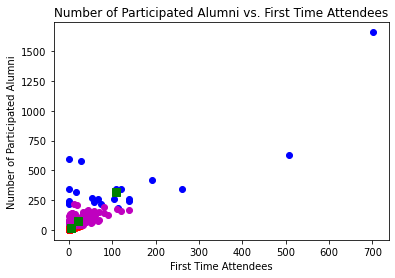

In [25]:
# 5.9 "Participated" Variable

# 5.9.1 3-means Clustering to Show Relationship between Participated and First Time Attendees
data = np.array(dataAlumni[["First Time Attendees", "Participated"]], dtype='f')
from scipy.cluster.vq import kmeans, vq 

# 5.9.2 To Compute k-means with k = 3 (3 clusters) 
centroids, _ = kmeans(data, 3) 

# 5.9.3 To Assign Each Sample to a Cluster 
index, _ = vq(data, centroids) 

# 5.9.4 Plot Different Color for Each Cluster by Its Index 
plt.plot(data[index==0,0],data[index==0,1],'or') 
plt.plot(data[index==1,0],data[index==1,1],'ob') 
plt.plot(data[index==2,0],data[index==2,1],'om')

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.xlabel("First Time Attendees")
plt.ylabel("Number of Participated Alumni")
plt.title("Number of Participated Alumni vs. First Time Attendees")

plt.show() 

# Finding: 3-means clustering shows the positive relationship between number of participated alumni and number of First Time Attendees 

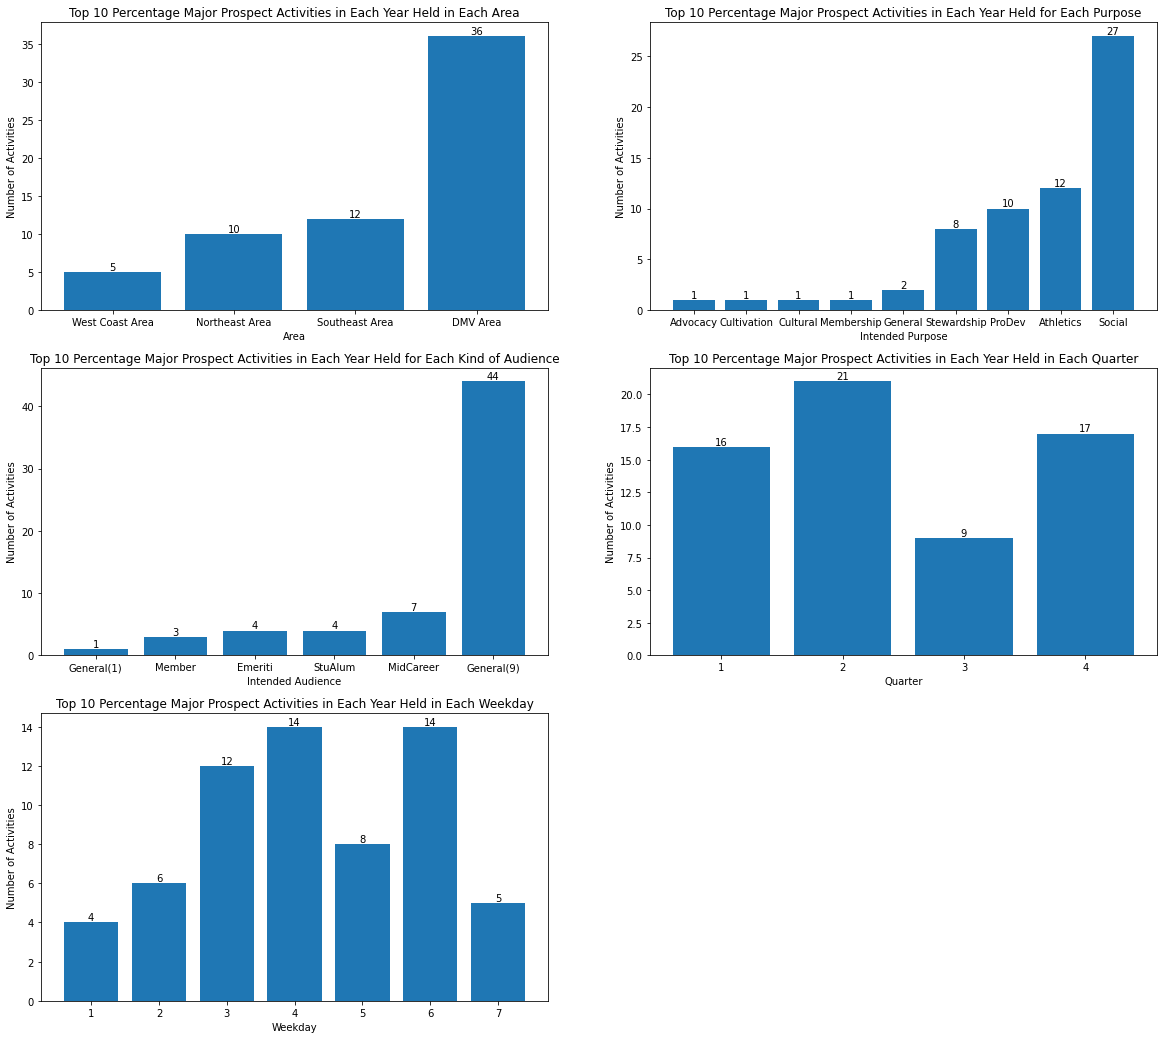

In [26]:
# Part Four: Preliminary Analysis to Explore the Factors Which Influence Major Prospects 

# Step 6: Using Boxplot, 3-means Clustering and Some Other Methods to Explore Which Factors Can Influence Major Prospects.

# 6.1 Overview: Find Top 10 Percentage Major Prospects in Each Year, to See Their Location, Intended Purpose, Intended Audience, Event Date
# 6.1.1 Find Top 10 Percentage Major Prospect Activities in Each Year, and concatenate the data
sortedData2019_PctMP = data2019.sort_values(["Percentage Major Prospect"],ascending=False).head(10)
sortedData2018_PctMP = data2018.sort_values(["Percentage Major Prospect"],ascending=False).head(10)
sortedData2017_PctMP = data2017.sort_values(["Percentage Major Prospect"],ascending=False).head(10)
sortedData2016_PctMP = data2016.sort_values(["Percentage Major Prospect"],ascending=False).head(10)
sortedData2015_PctMP = data2015.sort_values(["Percentage Major Prospect"],ascending=False).head(10)
sortedData2014_PctMP = data2014.sort_values(["Percentage Major Prospect"],ascending=False).head(10)
sortedData2013_PctMP = data2013.sort_values(["Percentage Major Prospect"],ascending=False).head(10)

top10_PctMP = pd.concat([sortedData2019_PctMP,sortedData2018_PctMP,sortedData2017_PctMP,sortedData2016_PctMP,sortedData2015_PctMP,sortedData2014_PctMP,sortedData2013_PctMP])

# 6.1.2 Top 10 Percentage Major Prospect Activities in Each Year Held in Each Area
plt.figure(figsize=(20,18))
areaTop10_PctMP = top10_PctMP.groupby(["Area"],as_index=False)["Event Name"].count()
areaTop10_PctMP.columns=["Area", "Number of Activities"]
areaTop10_PctMP = areaTop10_PctMP.sort_values(["Number of Activities"])

plt.subplot(321)
plt.bar(x=areaTop10_PctMP["Area"],height=areaTop10_PctMP["Number of Activities"])
plt.xlabel("Area")
plt.ylabel("Number of Activities")
plt.title("Top 10 Percentage Major Prospect Activities in Each Year Held in Each Area")

for x,y in zip(areaTop10_PctMP["Area"],areaTop10_PctMP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 6.1.3 Top 10 Percentage Major Prospect Activities in Each Year Held for Each Purpose
purposeTop10_PctMP = top10_PctMP.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeTop10_PctMP.columns=["Purpose", "Number of Activities"]
purposeTop10_PctMP = purposeTop10_PctMP.sort_values(["Number of Activities"])

plt.subplot(322)
plt.bar(x=purposeTop10_PctMP["Purpose"],height=purposeTop10_PctMP["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Top 10 Percentage Major Prospect Activities in Each Year Held for Each Purpose")

for x,y in zip(purposeTop10_PctMP["Purpose"],purposeTop10_PctMP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 6.1.4 Top 10 Percentage Major Prospect Activities in Each Year Held for Each Kind of Audience
audienceTop10_PctMP = top10_PctMP.groupby(["Audience"],as_index=False)["Event Name"].count()
audienceTop10_PctMP.columns=["Audience", "Number of Activities"]
audienceTop10_PctMP = audienceTop10_PctMP.sort_values(["Number of Activities"])

plt.subplot(323)
plt.bar(x=audienceTop10_PctMP["Audience"],height=audienceTop10_PctMP["Number of Activities"])
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Top 10 Percentage Major Prospect Activities in Each Year Held for Each Kind of Audience")

for x,y in zip(audienceTop10_PctMP["Audience"],audienceTop10_PctMP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 6.1.5 Top 10 Percentage Major Prospect Activities in Each Year Held in Each Quarter
quarterTop10_PctMP = top10_PctMP.groupby(["Quarter"],as_index=False)["Event Name"].count()
quarterTop10_PctMP.columns=["Quarter", "Number of Activities"]

plt.subplot(324)
plt.bar(x=quarterTop10_PctMP["Quarter"],height=quarterTop10_PctMP["Number of Activities"])
plt.xlabel("Quarter")
plt.ylabel("Number of Activities")
plt.xticks(range(1,5,1))
plt.title("Top 10 Percentage Major Prospect Activities in Each Year Held in Each Quarter")

for x,y in zip(quarterTop10_PctMP["Quarter"],quarterTop10_PctMP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 6.1.6 Top 10 Percentage Major Prospect Activities in Each Year Held in Each Weekday 
weekdayTop10_PctMP = top10_PctMP.groupby(["Weekday"],as_index=False)["Event Name"].count()
weekdayTop10_PctMP.columns=["Weekday", "Number of Activities"]

plt.subplot(325)
plt.bar(x=weekdayTop10_PctMP["Weekday"],height=weekdayTop10_PctMP["Number of Activities"])
plt.xlabel("Weekday")
plt.ylabel("Number of Activities")
plt.xticks(range(1,8,1))
plt.title("Top 10 Percentage Major Prospect Activities in Each Year Held in Each Weekday")

for x,y in zip(weekdayTop10_PctMP["Weekday"],weekdayTop10_PctMP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

plt.show()

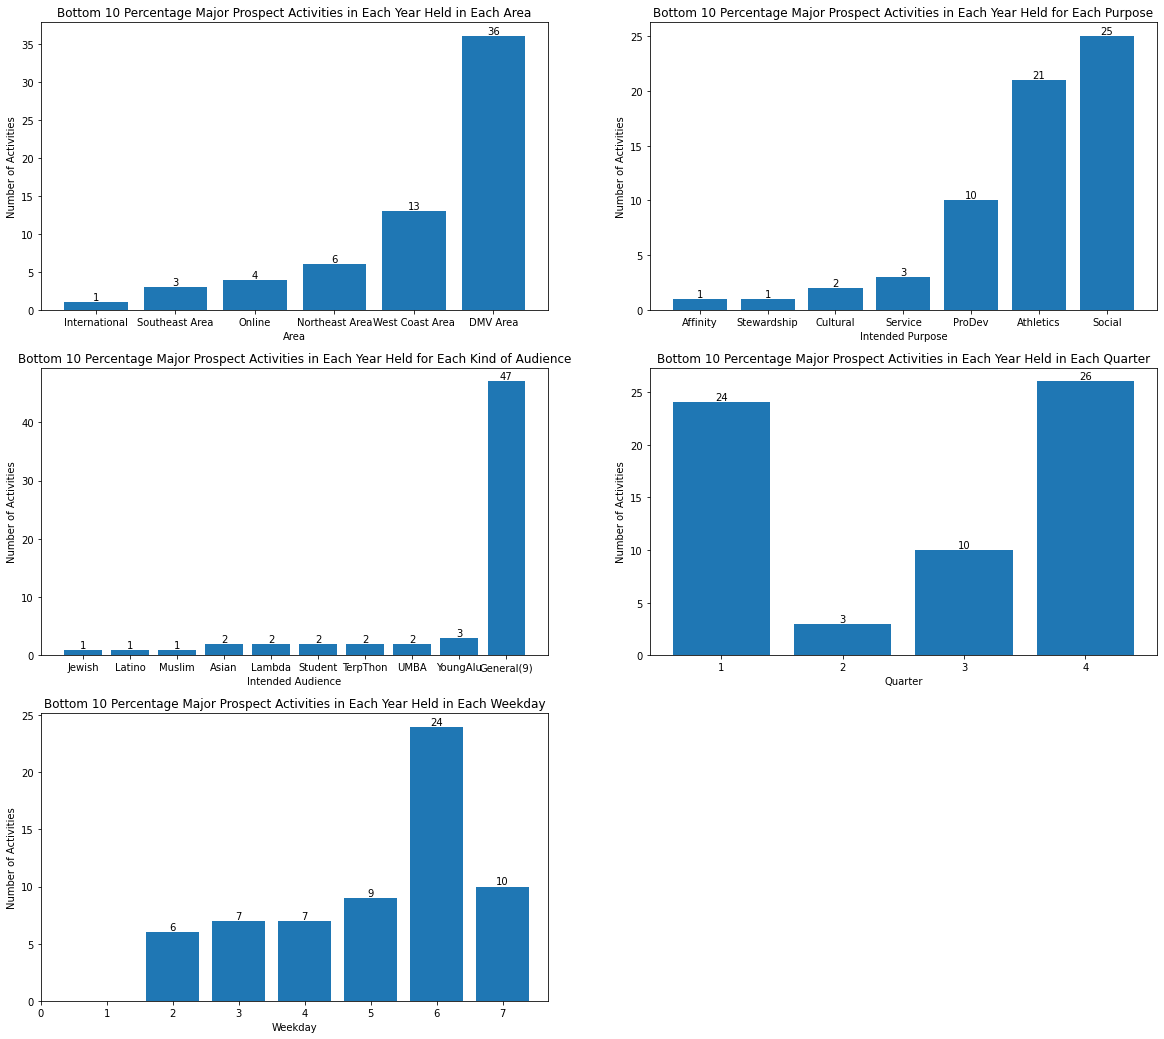

In [27]:
# 6.2 Overview: Find Bottom 10 Percentage Major Prospects in Each Year, to See Their Location, Intended Purpose, Intended Audience, Event Date
# 6.2.1 Find Bottom 10 Percentage Major Prospect Activities in Each Year, and concatenate the data
sortedData2019_PctMP1 = data2019.sort_values(["Percentage Major Prospect"],ascending=False).tail(10)
sortedData2018_PctMP1 = data2018.sort_values(["Percentage Major Prospect"],ascending=False).tail(10)
sortedData2017_PctMP1 = data2017.sort_values(["Percentage Major Prospect"],ascending=False).tail(10)
sortedData2016_PctMP1 = data2016.sort_values(["Percentage Major Prospect"],ascending=False).tail(10)
sortedData2015_PctMP1 = data2015.sort_values(["Percentage Major Prospect"],ascending=False).tail(10)
sortedData2014_PctMP1 = data2014.sort_values(["Percentage Major Prospect"],ascending=False).tail(10)
sortedData2013_PctMP1 = data2013.sort_values(["Percentage Major Prospect"],ascending=False).tail(10)

bottom10_PctMP = pd.concat([sortedData2019_PctMP1,sortedData2018_PctMP1,sortedData2017_PctMP1,sortedData2016_PctMP1,sortedData2015_PctMP1,sortedData2014_PctMP1,sortedData2013_PctMP1])

# 6.2.2 Bottom 10 Percentage Major Prospect Activities in Each Year Held in Each Area
plt.figure(figsize=(20,18))
areaBottom_PctMP = bottom10_PctMP.groupby(["Area"],as_index=False)["Event Name"].count()
areaBottom_PctMP.columns=["Area", "Number of Activities"]
areaBottom_PctMP = areaBottom_PctMP.sort_values(["Number of Activities"])

plt.subplot(321)
plt.bar(x=areaBottom_PctMP["Area"],height=areaBottom_PctMP["Number of Activities"])
plt.xlabel("Area")
plt.ylabel("Number of Activities")
plt.title("Bottom 10 Percentage Major Prospect Activities in Each Year Held in Each Area")

for x,y in zip(areaBottom_PctMP["Area"],areaBottom_PctMP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 6.2.3 Bottom 10 Percentage Major Prospect Activities in Each Year Held for Each Purpose
purposeBottom10_PctMP = bottom10_PctMP.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeBottom10_PctMP.columns=["Purpose", "Number of Activities"]
purposeBottom10_PctMP = purposeBottom10_PctMP.sort_values(["Number of Activities"])

plt.subplot(322)
plt.bar(x=purposeBottom10_PctMP["Purpose"],height=purposeBottom10_PctMP["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Bottom 10 Percentage Major Prospect Activities in Each Year Held for Each Purpose")

for x,y in zip(purposeBottom10_PctMP["Purpose"],purposeBottom10_PctMP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 6.2.4 Bottom 10 Percentage Major Prospect Activities in Each Year Held for Each Kind of Audience
audienceBottom10_PctMP = bottom10_PctMP.groupby(["Audience"],as_index=False)["Event Name"].count()
audienceBottom10_PctMP.columns=["Audience", "Number of Activities"]
audienceBottom10_PctMP = audienceBottom10_PctMP.sort_values(["Number of Activities"])

plt.subplot(323)
plt.bar(x=audienceBottom10_PctMP["Audience"],height=audienceBottom10_PctMP["Number of Activities"])
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Bottom 10 Percentage Major Prospect Activities in Each Year Held for Each Kind of Audience")

for x,y in zip(audienceBottom10_PctMP["Audience"],audienceBottom10_PctMP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 6.2.5 Bottom 10 Number of Major Prospect Activities in Each Year Held in Each Quarter
quarterBottom10_PctMP = bottom10_PctMP.groupby(["Quarter"],as_index=False)["Event Name"].count()
quarterBottom10_PctMP.columns=["Quarter", "Number of Activities"]

plt.subplot(324)
plt.bar(x=quarterBottom10_PctMP["Quarter"],height=quarterBottom10_PctMP["Number of Activities"])
plt.xlabel("Quarter")
plt.ylabel("Number of Activities")
plt.xticks(range(1,5,1))
plt.title("Bottom 10 Percentage Major Prospect Activities in Each Year Held in Each Quarter")

for x,y in zip(quarterBottom10_PctMP["Quarter"],quarterBottom10_PctMP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 6.2.6 Bottom 10 Number of Major Prospect Activities in Each Year Held in Each Weekday 
weekdayBottom10_PctMP = bottom10_PctMP.groupby(["Weekday"],as_index=False)["Event Name"].count()
weekdayBottom10_PctMP.columns=["Weekday", "Number of Activities"]

plt.subplot(325)
plt.bar(x=weekdayBottom10_PctMP["Weekday"],height=weekdayBottom10_PctMP["Number of Activities"])
plt.xlabel("Weekday")
plt.ylabel("Number of Activities")
plt.xticks(range(0,8,1))
plt.title("Bottom 10 Percentage Major Prospect Activities in Each Year Held in Each Weekday")

for x,y in zip(weekdayBottom10_PctMP["Weekday"],weekdayBottom10_PctMP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

plt.show()

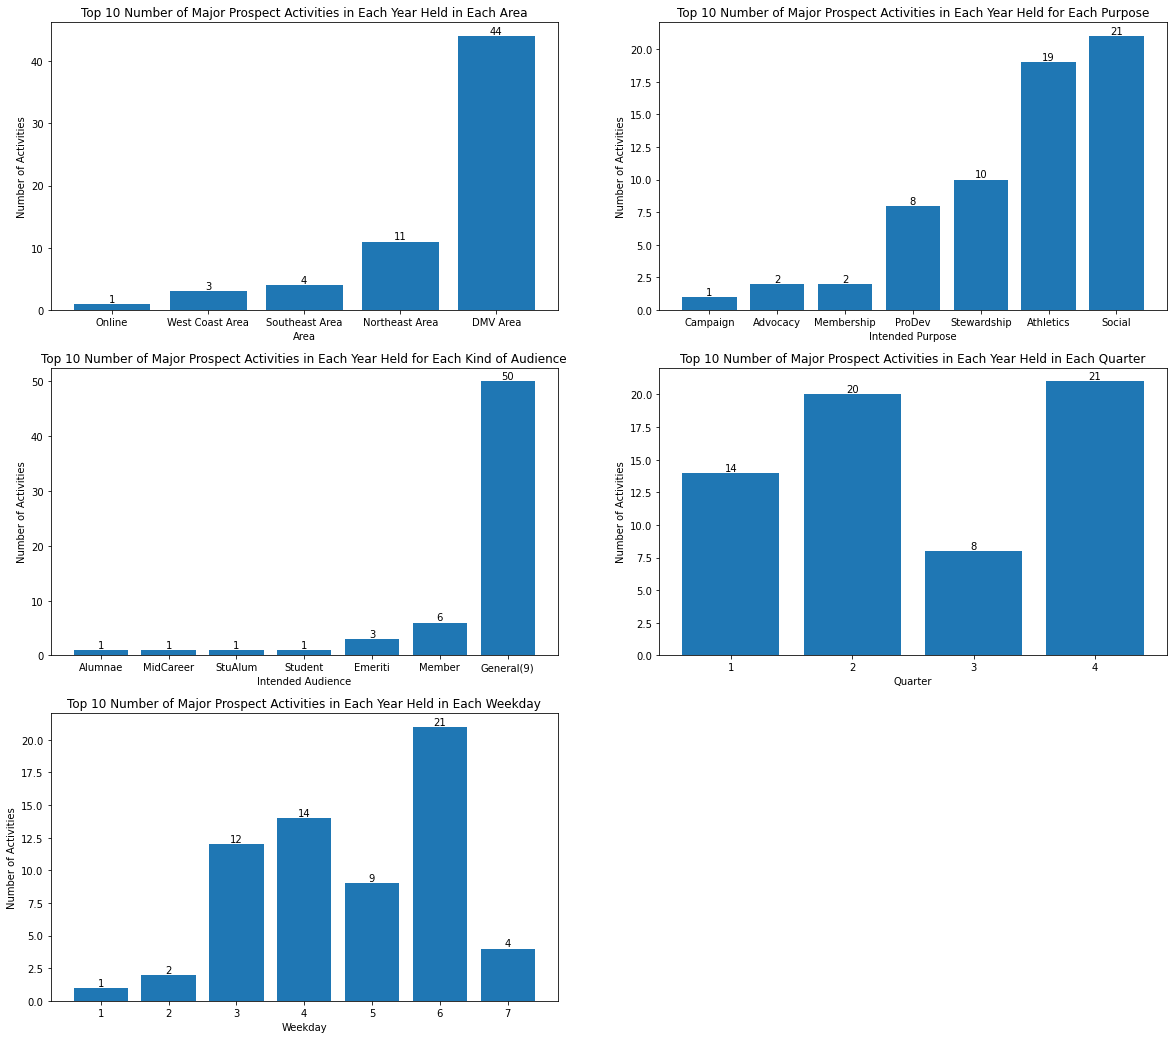

In [28]:
# 6.3 Overview: Find Top 10 Number of Major Prospects in Each Year, to See Their Location, Intended Purpose, Intended Audience, Event Date
# 6.3.1 Find Top 10 Number of Major Prospect Activities in Each Year, and concatenate the data
sortedData2019_MP = data2019.sort_values(["Major Prospects"],ascending=False).head(10)
sortedData2018_MP = data2018.sort_values(["Major Prospects"],ascending=False).head(10)
sortedData2017_MP = data2017.sort_values(["Major Prospects"],ascending=False).head(10)
sortedData2016_MP = data2016.sort_values(["Major Prospects"],ascending=False).head(10)
sortedData2015_MP = data2015.sort_values(["Major Prospects"],ascending=False).head(10)
sortedData2014_MP = data2014.sort_values(["Major Prospects"],ascending=False).head(10)
sortedData2013_MP = data2013.sort_values(["Major Prospects"],ascending=False).head(10)

top10_MP = pd.concat([sortedData2019_MP,sortedData2018_MP,sortedData2017_MP,sortedData2016_MP,sortedData2015_MP,sortedData2014_MP,sortedData2013_MP])

# 6.3.2 Top 10 Number of Major Prospect Activities in Each Year Held in Each Area
plt.figure(figsize=(20,18))
areaTop10_MP = top10_MP.groupby(["Area"],as_index=False)["Event Name"].count()
areaTop10_MP.columns=["Area", "Number of Activities"]
areaTop10_MP = areaTop10_MP.sort_values(["Number of Activities"])

plt.subplot(321)
plt.bar(x=areaTop10_MP["Area"],height=areaTop10_MP["Number of Activities"])
plt.xlabel("Area")
plt.ylabel("Number of Activities")
plt.title("Top 10 Number of Major Prospect Activities in Each Year Held in Each Area")

for x,y in zip(areaTop10_MP["Area"],areaTop10_MP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 6.3.3 Top 10 Number of Major Prospect Activities in Each Year Held for Each Purpose
purposeTop10_MP = top10_MP.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeTop10_MP.columns=["Purpose", "Number of Activities"]
purposeTop10_MP = purposeTop10_MP.sort_values(["Number of Activities"])

plt.subplot(322)
plt.bar(x=purposeTop10_MP["Purpose"],height=purposeTop10_MP["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Top 10 Number of Major Prospect Activities in Each Year Held for Each Purpose")

for x,y in zip(purposeTop10_MP["Purpose"],purposeTop10_MP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 6.3.4 Top 10 Number of Major Prospect Activities in Each Year Held for Each Kind of Audience
audienceTop10_MP = top10_MP.groupby(["Audience"],as_index=False)["Event Name"].count()
audienceTop10_MP.columns=["Audience", "Number of Activities"]
audienceTop10_MP = audienceTop10_MP.sort_values(["Number of Activities"])

plt.subplot(323)
plt.bar(x=audienceTop10_MP["Audience"],height=audienceTop10_MP["Number of Activities"])
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Top 10 Number of Major Prospect Activities in Each Year Held for Each Kind of Audience")

for x,y in zip(audienceTop10_MP["Audience"],audienceTop10_MP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 6.3.5 Top 10 Number of Major Prospect Activities in Each Year Held in Each Quarter
quarterTop10_MP = top10_MP.groupby(["Quarter"],as_index=False)["Event Name"].count()
quarterTop10_MP.columns=["Quarter", "Number of Activities"]

plt.subplot(324)
plt.bar(x=quarterTop10_MP["Quarter"],height=quarterTop10_MP["Number of Activities"])
plt.xlabel("Quarter")
plt.ylabel("Number of Activities")
plt.xticks(range(1,5,1))
plt.title("Top 10 Number of Major Prospect Activities in Each Year Held in Each Quarter")

for x,y in zip(quarterTop10_MP["Quarter"],quarterTop10_MP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 6.3.6 Top 10 Number of Major Prospect Activities in Each Year Held in Each Weekday 
weekdayTop10_MP = top10_MP.groupby(["Weekday"],as_index=False)["Event Name"].count()
weekdayTop10_MP.columns=["Weekday", "Number of Activities"]

plt.subplot(325)
plt.bar(x=weekdayTop10_MP["Weekday"],height=weekdayTop10_MP["Number of Activities"])
plt.xlabel("Weekday")
plt.ylabel("Number of Activities")
plt.xticks(range(1,8,1))
plt.title("Top 10 Number of Major Prospect Activities in Each Year Held in Each Weekday")

for x,y in zip(weekdayTop10_MP["Weekday"],weekdayTop10_MP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

plt.show()

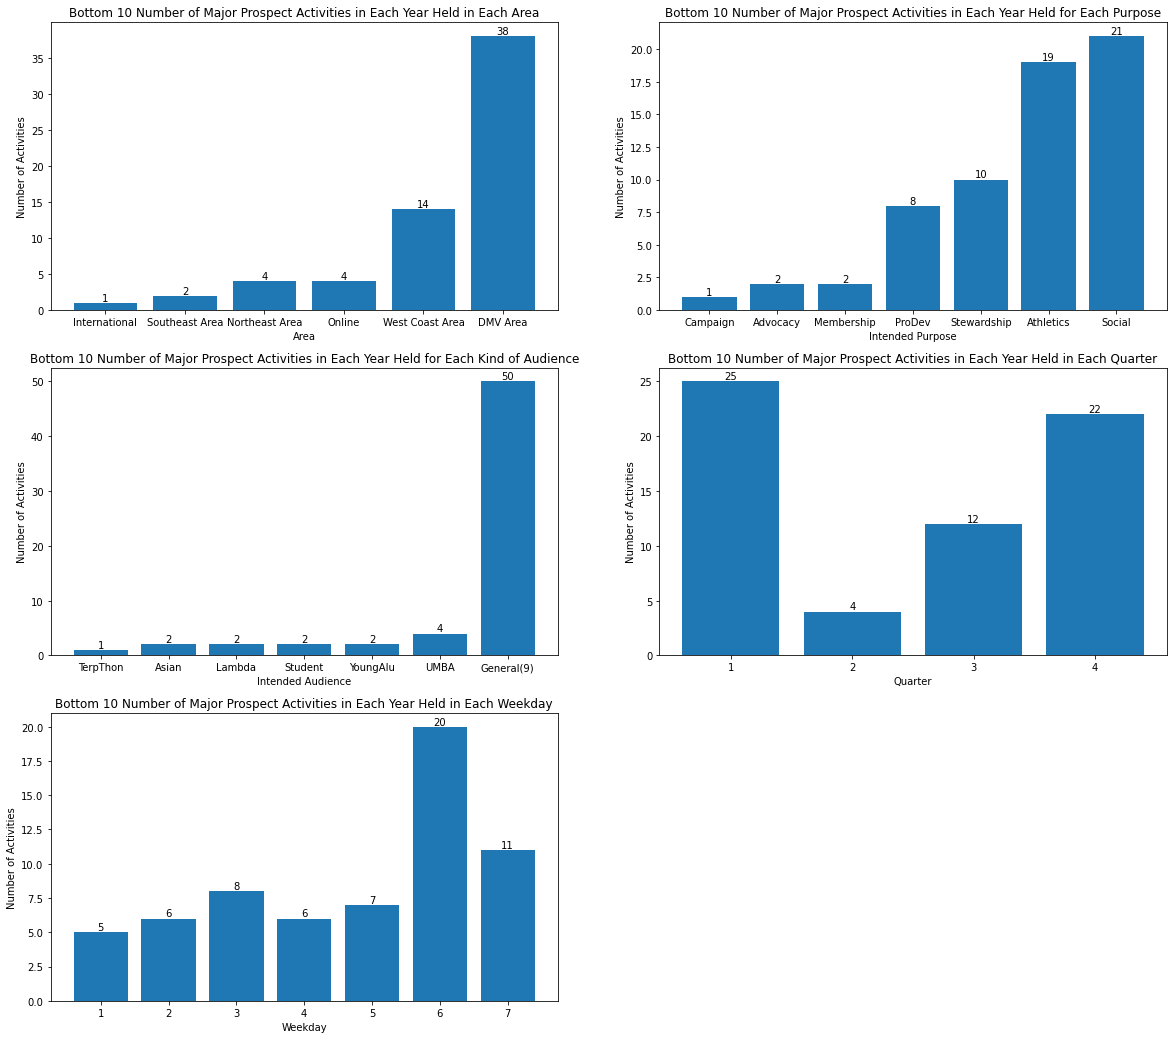

In [29]:
# 6.4 Overview: Find Bottom 10 Number of Major Prospects in Each Year, to See Their Location, Intended Purpose, Intended Audience, Event Date
# 6.4.1 Find Bottom 10 Number of Major Prospect Activities in Each Year, and concatenate the data
sortedData2019_MP1 = data2019.sort_values(["Major Prospects"],ascending=False).tail(10)
sortedData2018_MP1 = data2018.sort_values(["Major Prospects"],ascending=False).tail(10)
sortedData2017_MP1 = data2017.sort_values(["Major Prospects"],ascending=False).tail(10)
sortedData2016_MP1 = data2016.sort_values(["Major Prospects"],ascending=False).tail(10)
sortedData2015_MP1 = data2015.sort_values(["Major Prospects"],ascending=False).tail(10)
sortedData2014_MP1 = data2014.sort_values(["Major Prospects"],ascending=False).tail(10)
sortedData2013_MP1 = data2013.sort_values(["Major Prospects"],ascending=False).tail(10)

bottom10_MP = pd.concat([sortedData2019_MP1,sortedData2018_MP1,sortedData2017_MP1,sortedData2016_MP1,sortedData2015_MP1,sortedData2014_MP1,sortedData2013_MP1])

# 6.4.2 Bottom 10 Number of Major Prospect Activities in Each Year Held in Each Area
plt.figure(figsize=(20,18))
areaBottom_MP = bottom10_MP.groupby(["Area"],as_index=False)["Event Name"].count()
areaBottom_MP.columns=["Area", "Number of Activities"]
areaBottom_MP = areaBottom_MP.sort_values(["Number of Activities"])

plt.subplot(321)
plt.bar(x=areaBottom_MP["Area"],height=areaBottom_MP["Number of Activities"])
plt.xlabel("Area")
plt.ylabel("Number of Activities")
plt.title("Bottom 10 Number of Major Prospect Activities in Each Year Held in Each Area")

for x,y in zip(areaBottom_MP["Area"],areaBottom_MP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 6.4.3 Bottom 10 Number of Major Prospect Activities in Each Year Held for Each Purpose
purposeBottom10_MP = bottom10_MP.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeTop10_MP.columns=["Purpose", "Number of Activities"]
purposeTop10_MP = purposeTop10_MP.sort_values(["Number of Activities"])

plt.subplot(322)
plt.bar(x=purposeTop10_MP["Purpose"],height=purposeTop10_MP["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Bottom 10 Number of Major Prospect Activities in Each Year Held for Each Purpose")

for x,y in zip(purposeTop10_MP["Purpose"],purposeTop10_MP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 6.4.4 Bottom 10 Number of Major Prospect Activities in Each Year Held for Each Kind of Audience
audienceBottom10_MP = bottom10_MP.groupby(["Audience"],as_index=False)["Event Name"].count()
audienceBottom10_MP.columns=["Audience", "Number of Activities"]
audienceBottom10_MP = audienceBottom10_MP.sort_values(["Number of Activities"])

plt.subplot(323)
plt.bar(x=audienceBottom10_MP["Audience"],height=audienceBottom10_MP["Number of Activities"])
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Bottom 10 Number of Major Prospect Activities in Each Year Held for Each Kind of Audience")

for x,y in zip(audienceBottom10_MP["Audience"],audienceBottom10_MP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

    
# 6.4.5 Bottom 10 Number of Major Prospect Activities in Each Year Held in Each Quarter
quarterBottom10_MP = bottom10_MP.groupby(["Quarter"],as_index=False)["Event Name"].count()
quarterBottom10_MP.columns=["Quarter", "Number of Activities"]

plt.subplot(324)
plt.bar(x=quarterBottom10_MP["Quarter"],height=quarterBottom10_MP["Number of Activities"])
plt.xlabel("Quarter")
plt.ylabel("Number of Activities")
plt.xticks(range(1,5,1))
plt.title("Bottom 10 Number of Major Prospect Activities in Each Year Held in Each Quarter")

for x,y in zip(quarterBottom10_MP["Quarter"],quarterBottom10_MP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# 6.4.6 Bottom 10 Number of Major Prospect Activities in Each Year Held in Each Weekday 
weekdayBottom10_MP = bottom10_MP.groupby(["Weekday"],as_index=False)["Event Name"].count()
weekdayBottom10_MP.columns=["Weekday", "Number of Activities"]

plt.subplot(325)
plt.bar(x=weekdayBottom10_MP["Weekday"],height=weekdayBottom10_MP["Number of Activities"])
plt.xlabel("Weekday")
plt.ylabel("Number of Activities")
plt.xticks(range(1,8,1))
plt.title("Bottom 10 Number of Major Prospect Activities in Each Year Held in Each Weekday")

for x,y in zip(weekdayBottom10_MP["Weekday"],weekdayBottom10_MP["Number of Activities"]):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

plt.show()

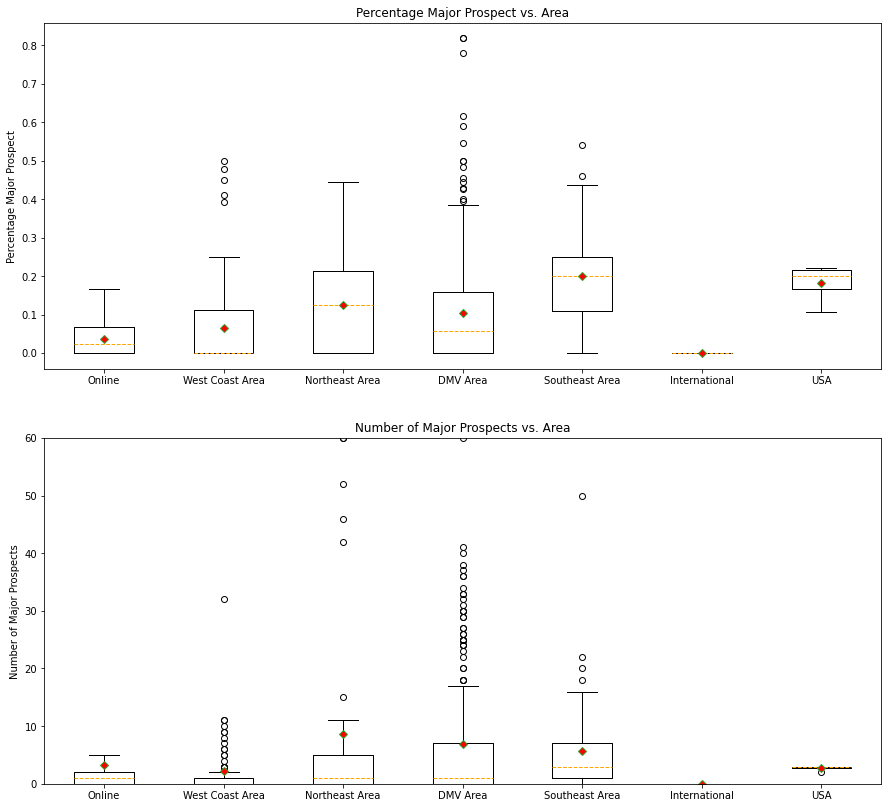

In [30]:
# 6.5 "Location" Variable
# 6.5.1 Show Boxplot for Percentage Major Prospect in Each Area.
plt.figure(figsize=(15,14))
plt.subplot(211)
aBox1 = dataAlumni.loc[dataAlumni["Area"]=="Online","Percentage Major Prospect"]
aBox2 = dataAlumni.loc[dataAlumni["Area"]=="West Coast Area","Percentage Major Prospect"]
aBox3 = dataAlumni.loc[dataAlumni["Area"]=="Northeast Area","Percentage Major Prospect"]
aBox4 = dataAlumni.loc[dataAlumni["Area"]=="DMV Area","Percentage Major Prospect"]
aBox5 = dataAlumni.loc[dataAlumni["Area"]=="Southeast Area","Percentage Major Prospect"]
aBox6 = dataAlumni.loc[dataAlumni["Area"]=="International","Percentage Major Prospect"]
aBox7 = dataAlumni.loc[dataAlumni["Area"]=="USA","Percentage Major Prospect"]
plt.boxplot([aBox1,aBox2,aBox3,aBox4,aBox5,aBox6,aBox7],labels=areaName,showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.ylabel("Percentage Major Prospect")
plt.title("Percentage Major Prospect vs. Area")

# 6.5.2 Show Boxplot for Number of Major Prospects in Each Area.
plt.subplot(212)
aBox6 = dataAlumni.loc[dataAlumni["Area"]=="Online","Major Prospects"]
aBox7 = dataAlumni.loc[dataAlumni["Area"]=="West Coast Area","Major Prospects"]
aBox8 = dataAlumni.loc[dataAlumni["Area"]=="Northeast Area","Major Prospects"]
aBox9 = dataAlumni.loc[dataAlumni["Area"]=="DMV Area","Major Prospects"]
aBox10 = dataAlumni.loc[dataAlumni["Area"]=="Southeast Area","Major Prospects"]
aBox11 = dataAlumni.loc[dataAlumni["Area"]=="International","Major Prospects"]
aBox12 = dataAlumni.loc[dataAlumni["Area"]=="USA","Major Prospects"]
plt.boxplot([aBox6,aBox7,aBox8,aBox9,aBox10,aBox11,aBox12],labels=areaName,showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.ylim(0,60)
plt.ylabel("Number of Major Prospects")
plt.title("Number of Major Prospects vs. Area")

plt.show()

# Findings: (1) Southeast area and USA have higher mean and median for percentage of major prospect attendees.
# (2) Southeast area has a highest median for number of Major Prospects, and Northeast area has a highest mean for number of Major Prospects

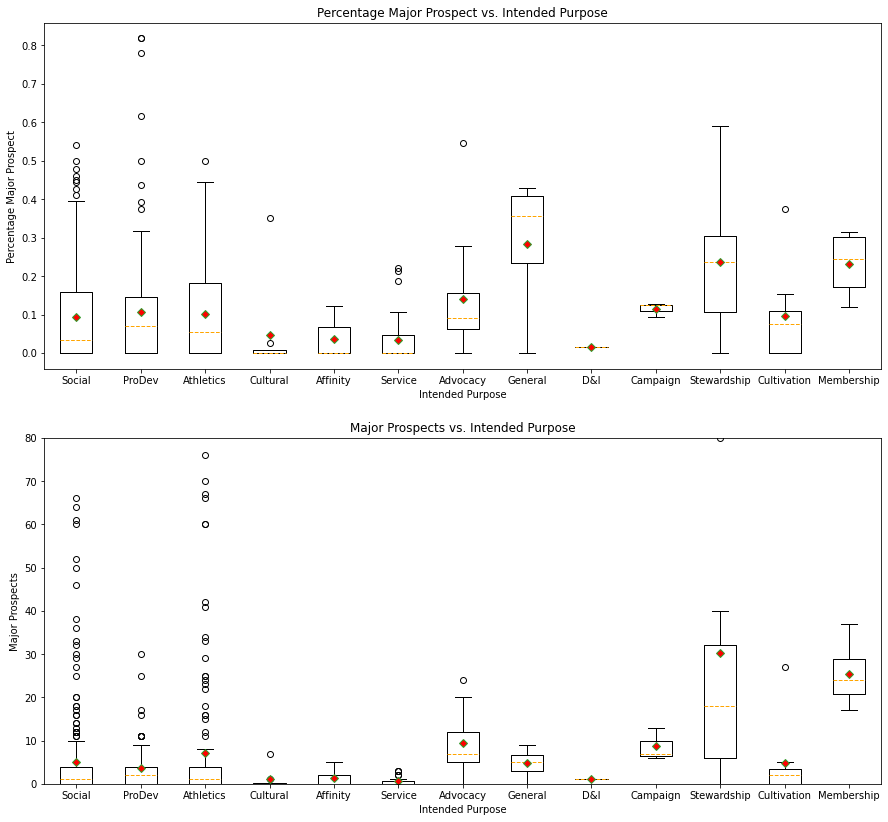

In [31]:
# 6.6 "Group" Variable
# 6.6.1 Show Boxplot for Percentage Major Prospect in Each Intended Purpose
plt.figure(figsize=(15,14))
plt.subplot(211)
pBox1 = dataAlumni.loc[dataAlumni["Purpose"]=="Social","Percentage Major Prospect"]
pBox2 = dataAlumni.loc[dataAlumni["Purpose"]=="ProDev","Percentage Major Prospect"]
pBox3 = dataAlumni.loc[dataAlumni["Purpose"]=="Athletics","Percentage Major Prospect"]
pBox4 = dataAlumni.loc[dataAlumni["Purpose"]=="Cultural","Percentage Major Prospect"]
pBox5 = dataAlumni.loc[dataAlumni["Purpose"]=="Affinity","Percentage Major Prospect"]
pBox6 = dataAlumni.loc[dataAlumni["Purpose"]=="Service","Percentage Major Prospect"]
pBox7 = dataAlumni.loc[dataAlumni["Purpose"]=="Advocacy","Percentage Major Prospect"]
pBox8 = dataAlumni.loc[dataAlumni["Purpose"]=="General","Percentage Major Prospect"]
pBox9 = dataAlumni.loc[dataAlumni["Purpose"]=="D&I","Percentage Major Prospect"]
pBox10 = dataAlumni.loc[dataAlumni["Purpose"]=="Campaign","Percentage Major Prospect"]
pBox11 = dataAlumni.loc[dataAlumni["Purpose"]=="Stewardship","Percentage Major Prospect"]
pBox12 = dataAlumni.loc[dataAlumni["Purpose"]=="Cultivation","Percentage Major Prospect"]
pBox13 = dataAlumni.loc[dataAlumni["Purpose"]=="Membership","Percentage Major Prospect"]
plt.boxplot([pBox1,pBox2,pBox3,pBox4,pBox5,pBox6,pBox7,pBox8,pBox9,pBox10,pBox11,pBox12,pBox13],labels=['Social','ProDev','Athletics','Cultural','Affinity','Service','Advocacy','General','D&I','Campaign','Stewardship','Cultivation','Membership'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Intended Purpose")
plt.ylabel("Percentage Major Prospect")
plt.title("Percentage Major Prospect vs. Intended Purpose")

# 6.6.2 Show Boxplot for Major Prospects in Each Intended Purpose
plt.subplot(212)
pBox14 = dataAlumni.loc[dataAlumni["Purpose"]=="Social","Major Prospects"]
pBox15 = dataAlumni.loc[dataAlumni["Purpose"]=="ProDev","Major Prospects"]
pBox16 = dataAlumni.loc[dataAlumni["Purpose"]=="Athletics","Major Prospects"]
pBox17 = dataAlumni.loc[dataAlumni["Purpose"]=="Cultural","Major Prospects"]
pBox18 = dataAlumni.loc[dataAlumni["Purpose"]=="Affinity","Major Prospects"]
pBox19 = dataAlumni.loc[dataAlumni["Purpose"]=="Service","Major Prospects"]
pBox20 = dataAlumni.loc[dataAlumni["Purpose"]=="Advocacy","Major Prospects"]
pBox21 = dataAlumni.loc[dataAlumni["Purpose"]=="General","Major Prospects"]
pBox22 = dataAlumni.loc[dataAlumni["Purpose"]=="D&I","Major Prospects"]
pBox23 = dataAlumni.loc[dataAlumni["Purpose"]=="Campaign","Major Prospects"]
pBox24 = dataAlumni.loc[dataAlumni["Purpose"]=="Stewardship","Major Prospects"]
pBox25 = dataAlumni.loc[dataAlumni["Purpose"]=="Cultivation","Major Prospects"]
pBox26 = dataAlumni.loc[dataAlumni["Purpose"]=="Membership","Major Prospects"]
plt.boxplot([pBox14,pBox15,pBox16,pBox17,pBox18,pBox19,pBox20,pBox21,pBox22,pBox23,pBox24,pBox25,pBox26],labels=['Social','ProDev','Athletics','Cultural','Affinity','Service','Advocacy','General','D&I','Campaign','Stewardship','Cultivation','Membership'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Intended Purpose")
plt.ylabel("Major Prospects")
plt.title("Major Prospects vs. Intended Purpose")
plt.ylim(0,80)

plt.show()

# Findings: (1) "General","Stewardship" and "Membership" Purpose relatively have higher mean and median of Percentage Major Prospect.
# (2) "Stewardship" and "Membership" Purpose have higher mean and median of number of Major Prospects.

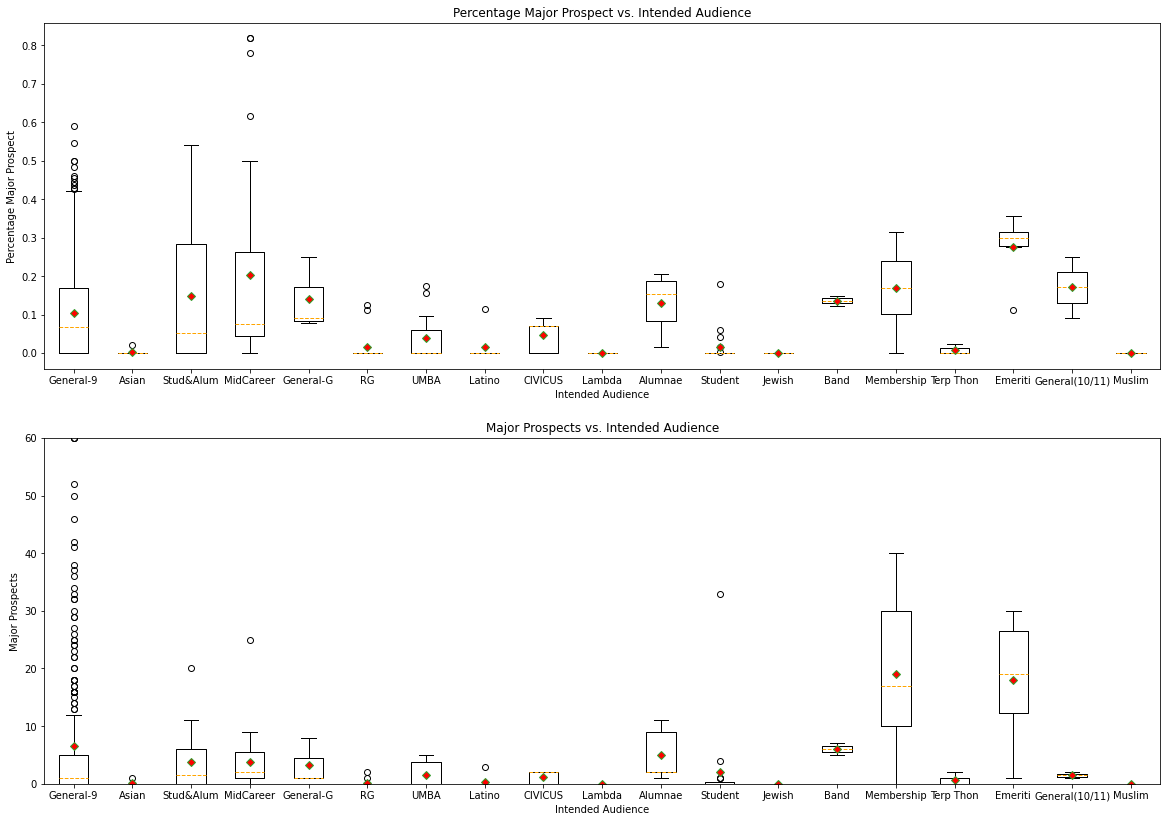

In [32]:
# 6.6.3 Show Boxplot for Percentage Major Prospect in Each Intended Audience
plt.figure(figsize=(20,14))
plt.subplot(211)
auBox1 = dataAlumni.loc[dataAlumni["Audience"]=="General(9)","Percentage Major Prospect"]
auBox2 = dataAlumni.loc[dataAlumni["Audience"]=="Asian","Percentage Major Prospect"]
auBox3 = dataAlumni.loc[dataAlumni["Audience"]=="StuAlum","Percentage Major Prospect"]
auBox4 = dataAlumni.loc[dataAlumni["Audience"]=="MidCareer","Percentage Major Prospect"]
auBox5 = dataAlumni.loc[dataAlumni["Audience"]=="General(G)","Percentage Major Prospect"]
auBox6 = dataAlumni.loc[dataAlumni["Audience"]=="YoungAlu","Percentage Major Prospect"]
auBox7 = dataAlumni.loc[dataAlumni["Audience"]=="UMBA","Percentage Major Prospect"]
auBox8 = dataAlumni.loc[dataAlumni["Audience"]=="Latino","Percentage Major Prospect"]
auBox9 = dataAlumni.loc[dataAlumni["Audience"]=="CIVICUS","Percentage Major Prospect"]
auBox10 = dataAlumni.loc[dataAlumni["Audience"]=="Lambda","Percentage Major Prospect"]
auBox11 = dataAlumni.loc[dataAlumni["Audience"]=="Alumnae","Percentage Major Prospect"]
auBox12 = dataAlumni.loc[dataAlumni["Audience"]=="Student","Percentage Major Prospect"]
auBox13 = dataAlumni.loc[dataAlumni["Audience"]=="Jewish","Percentage Major Prospect"]
auBox14 = dataAlumni.loc[dataAlumni["Audience"]=="Band","Percentage Major Prospect"]
auBox15 = dataAlumni.loc[dataAlumni["Audience"]=="Member","Percentage Major Prospect"]
auBox16 = dataAlumni.loc[dataAlumni["Audience"]=="TerpThon","Percentage Major Prospect"]
auBox17 = dataAlumni.loc[dataAlumni["Audience"]=="Emeriti","Percentage Major Prospect"]
auBox18 = dataAlumni.loc[dataAlumni["Audience"]=="General(1)","Percentage Major Prospect"]
auBox19 = dataAlumni.loc[dataAlumni["Audience"]=="Muslim","Percentage Major Prospect"]
plt.boxplot([auBox1,auBox2,auBox3,auBox4,auBox5,auBox6,auBox7,auBox8,auBox9,auBox10,auBox11,auBox12,auBox13,auBox14,auBox15,auBox16,auBox17,auBox18,auBox19],labels=['General-9','Asian','Stud&Alum','MidCareer','General-G','RG','UMBA','Latino','CIVICUS','Lambda','Alumnae','Student','Jewish','Band','Membership','Terp Thon','Emeriti','General(10/11)','Muslim'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Intended Audience")
plt.ylabel("Percentage Major Prospect")
plt.title("Percentage Major Prospect vs. Intended Audience")

# 6.6.4 Show Boxplot for Major Prospects in Each Intended Audience
plt.subplot(212)
audBox1 = dataAlumni.loc[dataAlumni["Audience"]=="General(9)","Major Prospects"]
audBox2 = dataAlumni.loc[dataAlumni["Audience"]=="Asian","Major Prospects"]
audBox3 = dataAlumni.loc[dataAlumni["Audience"]=="StuAlum","Major Prospects"]
audBox4 = dataAlumni.loc[dataAlumni["Audience"]=="MidCareer","Major Prospects"]
audBox5 = dataAlumni.loc[dataAlumni["Audience"]=="General(G)","Major Prospects"]
audBox6 = dataAlumni.loc[dataAlumni["Audience"]=="YoungAlu","Major Prospects"]
audBox7 = dataAlumni.loc[dataAlumni["Audience"]=="UMBA","Major Prospects"]
audBox8 = dataAlumni.loc[dataAlumni["Audience"]=="Latino","Major Prospects"]
audBox9 = dataAlumni.loc[dataAlumni["Audience"]=="CIVICUS","Major Prospects"]
audBox10 = dataAlumni.loc[dataAlumni["Audience"]=="Lambda","Major Prospects"]
audBox11 = dataAlumni.loc[dataAlumni["Audience"]=="Alumnae","Major Prospects"]
audBox12 = dataAlumni.loc[dataAlumni["Audience"]=="Student","Major Prospects"]
audBox13 = dataAlumni.loc[dataAlumni["Audience"]=="Jewish","Major Prospects"]
audBox14 = dataAlumni.loc[dataAlumni["Audience"]=="Band","Major Prospects"]
audBox15 = dataAlumni.loc[dataAlumni["Audience"]=="Member","Major Prospects"]
audBox16 = dataAlumni.loc[dataAlumni["Audience"]=="TerpThon","Major Prospects"]
audBox17 = dataAlumni.loc[dataAlumni["Audience"]=="Emeriti","Major Prospects"]
audBox18 = dataAlumni.loc[dataAlumni["Audience"]=="General(1)","Major Prospects"]
audBox19 = dataAlumni.loc[dataAlumni["Audience"]=="Muslim","Major Prospects"]
plt.boxplot([audBox1,audBox2,audBox3,audBox4,audBox5,audBox6,audBox7,audBox8,audBox9,audBox10,audBox11,audBox12,audBox13,audBox14,audBox15,audBox16,audBox17,audBox18,audBox19],labels=['General-9','Asian','Stud&Alum','MidCareer','General-G','RG','UMBA','Latino','CIVICUS','Lambda','Alumnae','Student','Jewish','Band','Membership','Terp Thon','Emeriti','General(10/11)','Muslim'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Intended Audience")
plt.ylabel("Major Prospects")
plt.title("Major Prospects vs. Intended Audience")
plt.ylim(0,60)

plt.show()

# Findings: (1) "Emeriti" Audience obviously has the highest mean and median of Percentage Major Prospect.
# (2) "Emeriti" Audience obviously has the highest median of number of Major Prospects and relatively has a higher mean of number of Major Prospects.
# (3) "Membership" Audience has the highest mean of number of Major Prospects. And it also has a high median of number of Major Prospects.

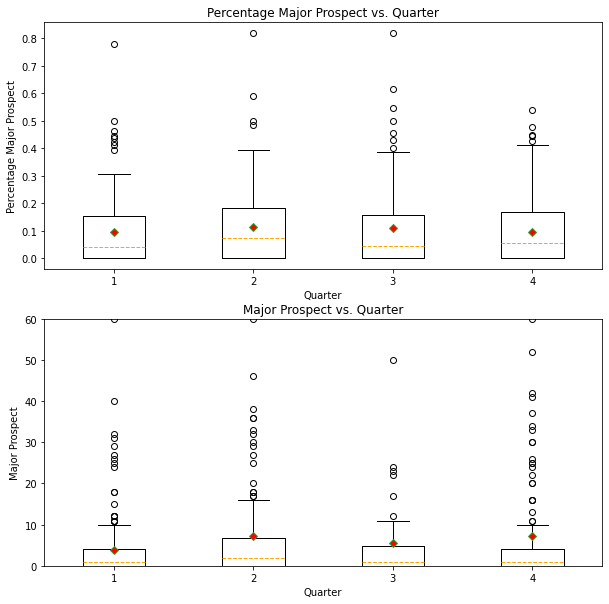

In [33]:
# 6.7 "Event Date" Variable
# 6.7.1 Show Boxplot for Percentage Major Prospect in Each Quarter
plt.figure(figsize=(10,10))
plt.subplot(211)
qBox1 = dataAlumni.loc[dataAlumni["Quarter"]==1,"Percentage Major Prospect"]
qBox2 = dataAlumni.loc[dataAlumni["Quarter"]==2,"Percentage Major Prospect"]
qBox3 = dataAlumni.loc[dataAlumni["Quarter"]==3,"Percentage Major Prospect"]
qBox4 = dataAlumni.loc[dataAlumni["Quarter"]==4,"Percentage Major Prospect"]
plt.boxplot([qBox1,qBox2,qBox3,qBox4],labels=['1','2','3','4'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Quarter")
plt.ylabel("Percentage Major Prospect")
plt.title("Percentage Major Prospect vs. Quarter")

# 6.7.2 Show Boxplot for Major Prospects in Each Quarter
plt.subplot(212)
qBox5 = dataAlumni.loc[dataAlumni["Quarter"]==1,"Major Prospects"]
qBox6 = dataAlumni.loc[dataAlumni["Quarter"]==2,"Major Prospects"]
qBox7 = dataAlumni.loc[dataAlumni["Quarter"]==3,"Major Prospects"]
qBox8 = dataAlumni.loc[dataAlumni["Quarter"]==4,"Major Prospects"]
plt.boxplot([qBox5,qBox6,qBox7,qBox8],labels=['1','2','3','4'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Quarter")
plt.ylabel("Major Prospect")
plt.title("Major Prospect vs. Quarter")
plt.ylim(0,60)

plt.show()

# Finding: Quarter is not a significant factor to influence Major Prospects.

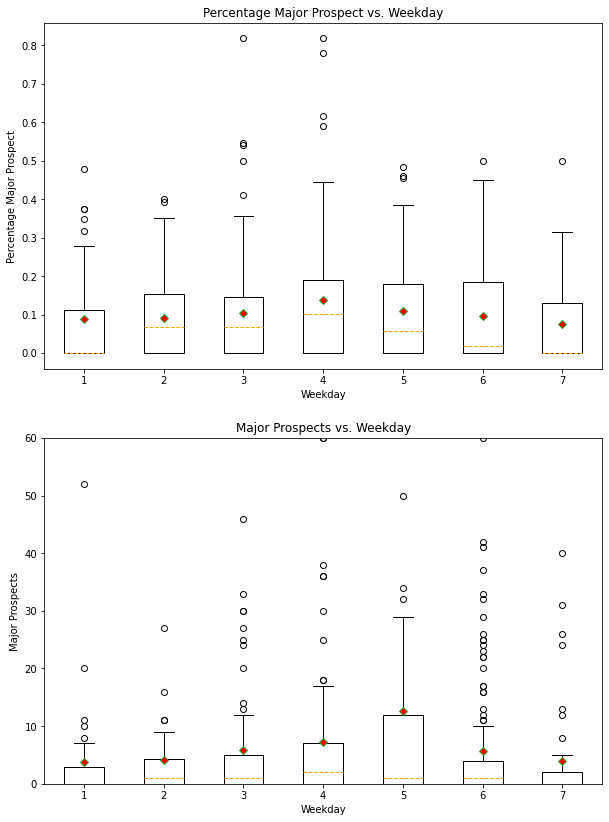

In [34]:
# 6.7.3 Show Boxplot for Percentage Major Prospect in Each Weekday
plt.figure(figsize=(10,14))
plt.subplot(211)
wBox1 = dataAlumni.loc[dataAlumni["Weekday"]==1,"Percentage Major Prospect"]
wBox2 = dataAlumni.loc[dataAlumni["Weekday"]==2,"Percentage Major Prospect"]
wBox3 = dataAlumni.loc[dataAlumni["Weekday"]==3,"Percentage Major Prospect"]
wBox4 = dataAlumni.loc[dataAlumni["Weekday"]==4,"Percentage Major Prospect"]
wBox5 = dataAlumni.loc[dataAlumni["Weekday"]==5,"Percentage Major Prospect"]
wBox6 = dataAlumni.loc[dataAlumni["Weekday"]==6,"Percentage Major Prospect"]
wBox7 = dataAlumni.loc[dataAlumni["Weekday"]==7,"Percentage Major Prospect"]
plt.boxplot([wBox1,wBox2,wBox3,wBox4,wBox5,wBox6,wBox7],labels=['1','2','3','4','5','6','7'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Weekday")
plt.ylabel("Percentage Major Prospect")
plt.title("Percentage Major Prospect vs. Weekday")

# 6.7.4 Show Boxplot for Major Prospects in Each Weekday
plt.subplot(212)
wBox8 = dataAlumni.loc[dataAlumni["Weekday"]==1,"Major Prospects"]
wBox9 = dataAlumni.loc[dataAlumni["Weekday"]==2,"Major Prospects"]
wBox10 = dataAlumni.loc[dataAlumni["Weekday"]==3,"Major Prospects"]
wBox11 = dataAlumni.loc[dataAlumni["Weekday"]==4,"Major Prospects"]
wBox12 = dataAlumni.loc[dataAlumni["Weekday"]==5,"Major Prospects"]
wBox13 = dataAlumni.loc[dataAlumni["Weekday"]==6,"Major Prospects"]
wBox14 = dataAlumni.loc[dataAlumni["Weekday"]==7,"Major Prospects"]
plt.boxplot([wBox8,wBox9,wBox10,wBox11,wBox12,wBox13,wBox14],labels=['1','2','3','4','5','6','7'],showmeans=True,meanprops = {'marker':'D', 'markerfacecolor':'r'},medianprops = {'linestyle':'--', 'color':'orange'})
plt.xlabel("Weekday")
plt.ylabel("Major Prospects")
plt.title("Major Prospects vs. Weekday")
plt.ylim(0,60)

plt.show()

# Finding: Weekday is not a significant factor to influence Major Prospects.

In [35]:
# 6.8 Activity" Variable
# 6.8.1 Events in Top 10 Percentage Major Prospect Activities
# If you want to see the full list of event name in Top 10 Percentage Major Prospect Activities, please remove the "#" in the next row
# print("Show Event Name in Top 10 Percentage Major Prospect Activities\n",top10_PctMP["Event Name"])

# After Previewing the Full List, Choose Several Kind of Activities(Key Words) which show many times, to See the Frequency of Them in Top 10 Percentage First Time Attendees Activities
gameWatch1 = 0
meetUp1 = 0
gala1 = 0
dinner1 = 0
happyHour1 = 0
tpn1 = 0

# Count the Frequency in Top 10
for i in top10_PctMP["Event Name"]:
    if "Game Watch" in i:
        gameWatch1 += 1
    elif "Meet Up" in i:
        meetUp1 += 1
    elif "Gala" in i:
        gala1 += 1
    elif "Dinner" in i or "Lunch" in i or "Breakfast" in i:
        dinner1 += 1
    elif "Happy Hour" in i:
        happyHour1 += 1
    elif "TPN" in i:
        tpn1 += 1

# Print the Outcome
for a,b in zip(["Game Watch","Meet Up","Gala","Dinner or Lunch or Breakfast","Happy Hour","TPN"],[str(gameWatch1),str(meetUp1),str(gala1),str(dinner1),str(happyHour1),str(tpn1)]):
    print("%s shows %s times among TOP 10 Percentage Major Prospect activities from 2013 to 2019" % (a,b))

print()
        
# 6.8.2 Events in Bottom 10 Percentage Major Prospect Activities
# If you want to see the full list of event name in Bottom 10 Percentage Major Prospect Activities, please remove the "#" in the next row
#print("Show Event Name in Bottom 10 Percentage Major Prospect Activities Activities\n",bottom10_PctMP["Event Name"])

# Choose the Same Kind of Activities as Above Ones, to See the Frequency of Them in Bottom 10 Percentage First Time Attendees Activities
gameWatch2 = 0
meetUp2 = 0
gala2 = 0
dinner2 = 0
happyHour2 = 0
tpn2 = 0

# Count the Frequency in Bottom 10
for i in bottom10_PctMP["Event Name"]:
    if "Game Watch" in i:
        gameWatch2 += 1
    elif "Meet Up" in i:
        meetUp2 += 1
    elif "Gala" in i:
        gala2 += 1
    elif "Dinner" in i or "Lunch" in i or "Breakfast" in i:
        dinner2 += 1
    elif "Happy Hour" in i:
        happyHour2 += 1
    elif "TPN" in i:
        tpn2 += 1

# Print the Outcome
for a,b in zip(["Game Watch","Meet Up","Gala","Dinner or Lunch or Breakfast","Happy Hour","TPN"],[str(gameWatch2),str(meetUp2),str(gala2),str(dinner2),str(happyHour2),str(tpn2)]):
    print("%s shows %s times among BOTTOM 10 Percentage Major Prospect activities from 2013 to 2019" % (a,b))

# Finding: Game Watch shows more times among BOTTOM 10 Percentage Major Prospect activities and less times among TOP 10, while Meet Up performed much better.

Game Watch shows 6 times among TOP 10 Percentage Major Prospect activities from 2013 to 2019
Meet Up shows 9 times among TOP 10 Percentage Major Prospect activities from 2013 to 2019
Gala shows 2 times among TOP 10 Percentage Major Prospect activities from 2013 to 2019
Dinner or Lunch or Breakfast shows 6 times among TOP 10 Percentage Major Prospect activities from 2013 to 2019
Happy Hour shows 2 times among TOP 10 Percentage Major Prospect activities from 2013 to 2019
TPN shows 1 times among TOP 10 Percentage Major Prospect activities from 2013 to 2019

Game Watch shows 25 times among BOTTOM 10 Percentage Major Prospect activities from 2013 to 2019
Meet Up shows 0 times among BOTTOM 10 Percentage Major Prospect activities from 2013 to 2019
Gala shows 2 times among BOTTOM 10 Percentage Major Prospect activities from 2013 to 2019
Dinner or Lunch or Breakfast shows 0 times among BOTTOM 10 Percentage Major Prospect activities from 2013 to 2019
Happy Hour shows 6 times among BOTTOM 10 Perc

In [36]:
# 6.8.3 Events in Top 10 Major Prospects Activities
# If you want to see the full list of event name in Top 10 Major Prospects Activities, please remove the "#" in the next row
# print("Show Event Name in Top 10 Major Prospects Activities\n",top10_MP["Event Name"])

# After Previewing the Full List, Choose Several Kind of Activities(Key Words) which show many times, to See the Frequency of Them in Top 10 Percentage First Time Attendees Activities
gameWatch3 = 0
meetUp3 = 0
gala3 = 0
dinner3 = 0
happyHour3 = 0
tpn3 = 0

# Count the Frequency in Top 10
for i in top10_MP["Event Name"]:
    if "Game Watch" in i:
        gameWatch3 += 1
    elif "Meet Up" in i:
        meetUp3 += 1
    elif "Gala" in i:
        gala3 += 1
    elif "Dinner" in i or "Lunch" in i or "Breakfast" in i:
        dinner3 += 1
    elif "Happy Hour" in i:
        happyHour3 += 1
    elif "TPN" in i:
        tpn3 += 1

# Print the Outcome
for a,b in zip(["Game Watch","Meet Up","Gala","Dinner or Lunch or Breakfast","Happy Hour","TPN"],[str(gameWatch3),str(meetUp3),str(gala3),str(dinner3),str(happyHour3),str(tpn3)]):
    print("%s shows %s times among TOP 10 Major Prospects activities from 2013 to 2019" % (a,b))

print()
        
# 6.8.4 Events in Bottom 10 Major Prospects Activities
# If you want to see the full list of event name in Bottom 10 Major Prospects Activities, please remove the "#" in the next row
#print("Show Event Name in Bottom 10 Major Prospects Activities Activities\n",bottom10_MP["Event Name"])

# Choose the Same Kind of Activities as Above Ones, to See the Frequency of Them in Bottom 10 Percentage First Time Attendees Activities
gameWatch4 = 0
meetUp4 = 0
gala4 = 0
dinner4 = 0
happyHour4 = 0
tpn4 = 0

# Count the Frequency in Top 10
for i in bottom10_MP["Event Name"]:
    if "Game Watch" in i:
        gameWatch4 += 1
    elif "Meet Up" in i:
        meetUp4 += 1
    elif "Gala" in i:
        gala4 += 1
    elif "Dinner" in i or "Lunch" in i or "Breakfast" in i:
        dinner4 += 1
    elif "Happy Hour" in i:
        happyHour4 += 1
    elif "TPN" in i:
        tpn4 += 1

# Print the Outcome
for a,b in zip(["Game Watch","Meet Up","Gala","Dinner or Lunch or Breakfast","Happy Hour","TPN"],[str(gameWatch4),str(meetUp4),str(gala4),str(dinner4),str(happyHour4),str(tpn4)]):
    print("%s shows %s times among BOTTOM 10 percentage Major Prospects activities from 2013 to 2019" % (a,b))
    
# Finding: Game Watch and Happy Hour show more times among BOTTOM 10 number of Major Prospects activities and less times among TOP 10.

Game Watch shows 2 times among TOP 10 Major Prospects activities from 2013 to 2019
Meet Up shows 3 times among TOP 10 Major Prospects activities from 2013 to 2019
Gala shows 3 times among TOP 10 Major Prospects activities from 2013 to 2019
Dinner or Lunch or Breakfast shows 3 times among TOP 10 Major Prospects activities from 2013 to 2019
Happy Hour shows 1 times among TOP 10 Major Prospects activities from 2013 to 2019
TPN shows 0 times among TOP 10 Major Prospects activities from 2013 to 2019

Game Watch shows 21 times among BOTTOM 10 percentage Major Prospects activities from 2013 to 2019
Meet Up shows 0 times among BOTTOM 10 percentage Major Prospects activities from 2013 to 2019
Gala shows 2 times among BOTTOM 10 percentage Major Prospects activities from 2013 to 2019
Dinner or Lunch or Breakfast shows 0 times among BOTTOM 10 percentage Major Prospects activities from 2013 to 2019
Happy Hour shows 7 times among BOTTOM 10 percentage Major Prospects activities from 2013 to 2019
TPN 

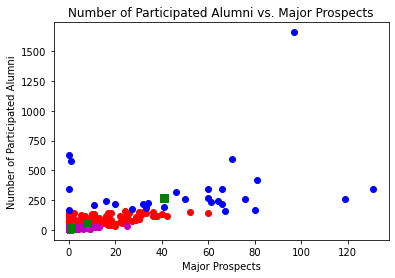

In [37]:
# 6.9 "Participated" Variable
# 6.9.1 3-means Clustering to Show Relationship between Participated and Major Prospects
data = np.array(dataAlumni[["Major Prospects", "Participated"]], dtype='f')
from scipy.cluster.vq import kmeans, vq 

# 6.9.2 To Compute k-means with k = 3 (3 clusters) 
centroids, _ = kmeans(data, 3) 

# 6.9.3 To Assign Each Sample to a Cluster 
index, _ = vq(data, centroids) 

# 6.9.4 Plot Different Color for Each Cluster by Its Index 
plt.plot(data[index==0,0],data[index==0,1],'or') 
plt.plot(data[index==1,0],data[index==1,1],'ob') 
plt.plot(data[index==2,0],data[index==2,1],'om') 
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.xlabel("Major Prospects")
plt.ylabel("Number of Participated Alumni")
plt.title("Number of Participated Alumni vs. Major Prospects")

plt.show() 

# Finding: 3-means clustering also shows the positive relationship between number of Participated alumni and Major Prospects .

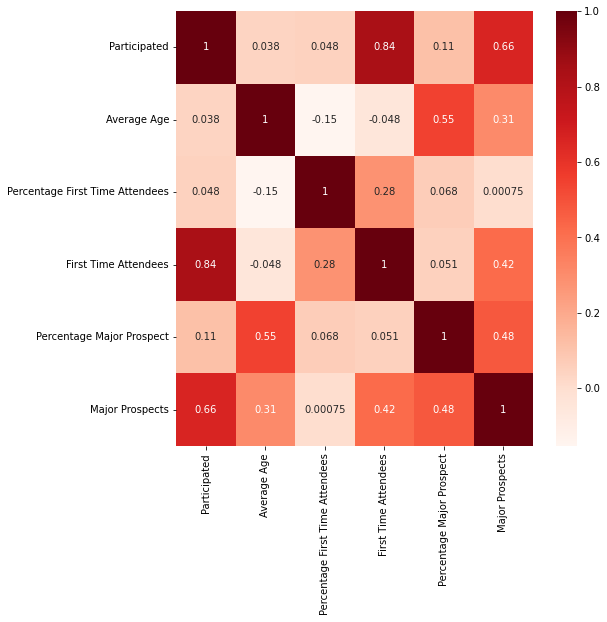

In [38]:
# Part Five: Further Analysis to Explore the Factors Which Influence First Time Attendees and Major Prospects

# Step 7: Multiple Regression 

# 7.1 Some Analysis before Multiple Regression 
# 7.1.1 Show Correlations between Numeric Variables
import seaborn as sns

dataAlumni_cor = dataAlumni[["Participated", "Average Age", "Percentage First Time Attendees","First Time Attendees", "Percentage Major Prospect","Major Prospects"]].corr()
figure, ax = plt.subplots(figsize = (8, 8))
heatmap = sns.heatmap(dataAlumni_cor, cmap = "Reds", annot = True)
heatmap.xaxis.tick_bottom()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
heatmap.xaxis.set_label_position('top')
plt.savefig('Corr.png')
plt.show()

# Finding: Average Age may be a factor which also influences Percentage Major Prospect and Major Prospects.

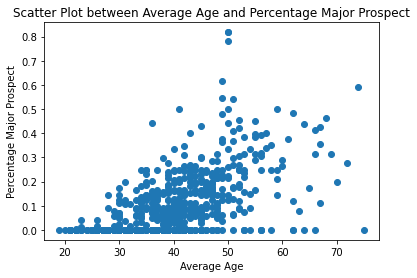

R-sqaure of Linear Fit: 0.30175278191250243
Percentage Major Prospect = -0.1951 + 0.0074 * Average Age
R-sqaure of Logarithmic Fit: 0.2867015201847151
Percentage Major Prospect = -0.9427 + 0.2853 * log(Average Age)


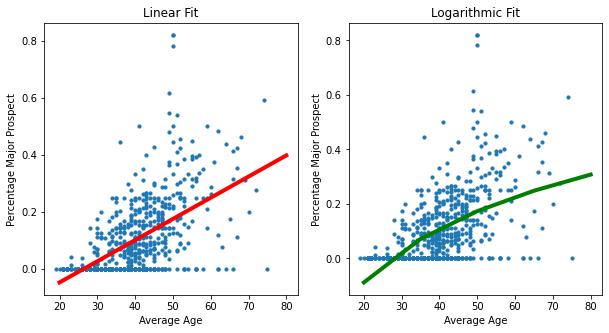

In [39]:
# 7.1.2 Regression between Percentage Major Prospect and Average Age
x = dataAlumni["Average Age"]
y = dataAlumni["Percentage Major Prospect"]
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Average Age")
ax.set_ylabel("Percentage Major Prospect")
ax.set_title("Scatter Plot between Average Age and Percentage Major Prospect")
plt.show()

from scipy.stats import linregress
from scipy.optimize import curve_fit

# 7.1.2.1 Linear Fit
linSlope, linIntercept, linR, linP, linSE = linregress(x, y)
print("R-sqaure of Linear Fit:", linR**2)
print("Percentage Major Prospect = %.4f + %.4f * Average Age" % (linIntercept, linSlope))
figure, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].scatter(x, y, s = 10)
dem = np.linspace(20, 80, 5)
ax[0].plot(dem, linIntercept + linSlope * dem, '-r', linewidth = 4)
ax[0].set_xlabel("Average Age")
ax[0].set_ylabel("Percentage Major Prospect")
ax[0].set_title("Linear Fit")

# 7.1.2.2 Logarithmic Fit
logSlope, logIntercept, logR, logP, logSE = linregress(np.log(x), y)
print("R-sqaure of Logarithmic Fit:", logR**2)
print("Percentage Major Prospect = %.4f + %.4f * log(Average Age)" % (logIntercept, logSlope))
ax[1].scatter(x, y, s = 10)
dem = np.linspace(20, 80, 5)
ax[1].plot(dem, logIntercept + logSlope * np.log(dem), '-g', linewidth = 4)
ax[1].set_xlabel("Average Age")
ax[1].set_ylabel("Percentage Major Prospect")
ax[1].set_title("Logarithmic Fit")
plt.show()

# Fingding: For regression between Percentage Major Prospect and Average Age, linear fit is better.

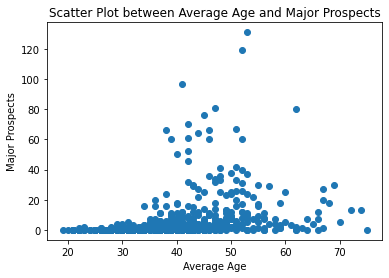

R-sqaure of Linear Fit: 0.09507469841238506
Major Prospects = -11.9680 + 0.4470 * Average Age
R-sqaure of Logarithmic Fit: 0.09497547650124057
Major Prospects = -58.6564 + 17.6465 * log(Average Age)


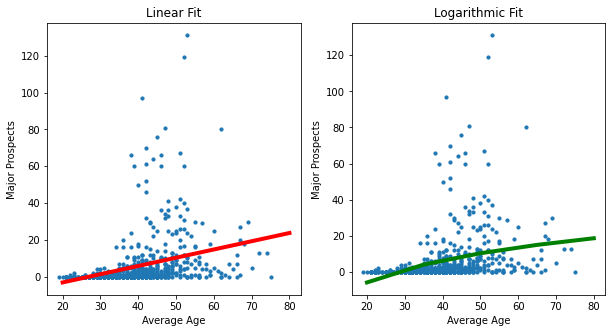

In [40]:
# 7.1.3 Regression between Major Prospects and Average Age
x = dataAlumni["Average Age"]
y = dataAlumni["Major Prospects"]
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Average Age")
ax.set_ylabel("Major Prospects")
ax.set_title("Scatter Plot between Average Age and Major Prospects")
plt.show()

# 7.1.3.1 Linear Fit
linSlope, linIntercept, linR, linP, linSE = linregress(x, y)
print("R-sqaure of Linear Fit:", linR**2)
print("Major Prospects = %.4f + %.4f * Average Age" % (linIntercept, linSlope))
figure, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].scatter(x, y, s = 10)
dem = np.linspace(20, 80, 5)
ax[0].plot(dem, linIntercept + linSlope * dem, '-r', linewidth = 4)
ax[0].set_xlabel("Average Age")
ax[0].set_ylabel("Major Prospects")
ax[0].set_title("Linear Fit")

# 7.1.3.2 Logarithmic Fit
logSlope, logIntercept, logR, logP, logSE = linregress(np.log(x), y)
print("R-sqaure of Logarithmic Fit:", logR**2)
print("Major Prospects = %.4f + %.4f * log(Average Age)" % (logIntercept, logSlope))
ax[1].scatter(x, y, s = 10)
dem = np.linspace(20, 80, 5)
ax[1].plot(dem, logIntercept + logSlope * np.log(dem), '-g', linewidth = 4)
ax[1].set_xlabel("Average Age")
ax[1].set_ylabel("Major Prospects")
ax[1].set_title("Logarithmic Fit")
plt.show()

# Finding: For regression between Major Prospects and Average Age, Linear fit is better.

In [41]:
# 7.1.4 Using Analysis of Variance before Multiple Regression to Exclude Some Insignificant Variables First
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

print("Percentage First Time Attendees:")
anovat1 = anova_lm(ols('dataAlumni["Percentage First Time Attendees"]~C(Area)+C(Purpose)+C(Audience)+C(Quarter)+C(Weekday)', data=dataAlumni).fit())
print(anovat1)
print()
# Finding: Different levels of Factor Weekday does not have significant different impact on Percentage First Time Attendees.

print("First Time Attendees:")
anovat2 = anova_lm(ols('dataAlumni["First Time Attendees"]~C(Area)+C(Purpose)+C(Audience)+C(Quarter)+C(Weekday)', data=dataAlumni).fit())
print(anovat2)
print()
# Finding: Different levels of Factor Purpose, Quarter and Weekday do not have significant different impact on First Time Attendees.

print("Percentage Major Prospect:")
anovat3 = anova_lm(ols('dataAlumni["Percentage Major Prospect"]~C(Area)+C(Purpose)+C(Audience)+C(Quarter)+C(Weekday)', data=dataAlumni).fit())
print(anovat3)
print()
# Finding: Different levels of factor Quarter, Weekday do not have significant different impact on Percentage Major Prospect.

print("Major Prospects:")
anovat4 = anova_lm(ols('dataAlumni["Major Prospects"]~C(Area)+C(Purpose)+C(Audience)+C(Quarter)+C(Weekday)', data=dataAlumni).fit())
print(anovat4)
# Finding: Different levels of factor Weekday does not have significant different impact on Percentage Major Prospect.

Percentage First Time Attendees:
                df     sum_sq   mean_sq         F    PR(>F)
C(Area)        6.0   1.139019  0.189836  3.647217  0.001459
C(Purpose)    12.0   1.364137  0.113678  2.184031  0.011268
C(Audience)   18.0   3.054705  0.169706  3.260459  0.000007
C(Quarter)     3.0   0.801114  0.267038  5.130448  0.001652
C(Weekday)     6.0   0.110725  0.018454  0.354549  0.907290
Residual     576.0  29.980611  0.052050       NaN       NaN

First Time Attendees:
                df         sum_sq      mean_sq         F    PR(>F)
C(Area)        6.0   18321.189042  3053.531507  1.908664  0.077349
C(Purpose)    12.0    9954.091922   829.507660  0.518499  0.903385
C(Audience)   18.0   82103.673348  4561.315186  2.851131  0.000080
C(Quarter)     3.0    6535.457101  2178.485700  1.361701  0.253561
C(Weekday)     6.0   10785.960550  1797.660092  1.123660  0.346929
Residual     576.0  921499.956011  1599.826313       NaN       NaN

Percentage Major Prospect:
                df    sum_s

In [42]:
# 7.2 Multiple Regression on Percentage First Time Attendees
lm_multi1 = ols('dataAlumni["Percentage First Time Attendees"]~dataAlumni["Average Age"]+C(Area)+C(Purpose)+C(Audience)+C(Quarter)', data=dataAlumni).fit()
print(lm_multi1.summary())

# Findings: International, General Purpose, Student and Muslim Audience, Quarter 3 have a statistically significant positive effect on Percentage First Time Attendees
# Average Age has a statistically significant negative effect on Percentage First Time Attendees

                                          OLS Regression Results                                         
Dep. Variable:     dataAlumni["Percentage First Time Attendees"]   R-squared:                       0.184
Model:                                                       OLS   Adj. R-squared:                  0.128
Method:                                            Least Squares   F-statistic:                     3.281
Date:                                           Fri, 10 Dec 2021   Prob (F-statistic):           3.06e-10
Time:                                                   21:41:58   Log-Likelihood:                 63.062
No. Observations:                                            622   AIC:                            -44.12
Df Residuals:                                                581   BIC:                             137.6
Df Model:                                                     40                                         
Covariance Type:                              

In [43]:
# 7.3 Multiple Regression on First Time Attendees
lm_multi2 = ols('dataAlumni["First Time Attendees"]~dataAlumni["Average Age"]+dataAlumni["Participated"]+C(Area)+C(Audience)', data=dataAlumni).fit()
print(lm_multi2.summary())

# Findings: Student Audience, Participated have a statistically significant positive effect on  First Time Attendees 
# Average Age has a statistically significant negative effect on First Time Attendees

                                    OLS Regression Results                                    
Dep. Variable:     dataAlumni["First Time Attendees"]   R-squared:                       0.726
Model:                                            OLS   Adj. R-squared:                  0.714
Method:                                 Least Squares   F-statistic:                     60.49
Date:                                Fri, 10 Dec 2021   Prob (F-statistic):          2.56e-148
Time:                                        21:41:58   Log-Likelihood:                -2791.4
No. Observations:                                 622   AIC:                             5637.
Df Residuals:                                     595   BIC:                             5757.
Df Model:                                          26                                         
Covariance Type:                            nonrobust                                         
                                 coef    std err  

In [44]:
# 7.4 Multiple Regression on Percentage Major Prospect
lm_multi3 = ols('dataAlumni["Percentage Major Prospect"]~dataAlumni["Average Age"]+C(Area)+C(Purpose)+C(Audience)', data=dataAlumni).fit()
print(lm_multi3.summary())

# Findings: Northeast area, Southeast area, USA, Stewardship Purpose, Mid Career Audience and Average Age have a statistically significant positive effect on Percentage Major Prospect

                                       OLS Regression Results                                      
Dep. Variable:     dataAlumni["Percentage Major Prospect"]   R-squared:                       0.436
Model:                                                 OLS   Adj. R-squared:                  0.400
Method:                                      Least Squares   F-statistic:                     12.20
Date:                                     Fri, 10 Dec 2021   Prob (F-statistic):           1.99e-51
Time:                                             21:41:58   Log-Likelihood:                 558.19
No. Observations:                                      622   AIC:                            -1040.
Df Residuals:                                          584   BIC:                            -871.9
Df Model:                                               37                                         
Covariance Type:                                 nonrobust                                         


In [45]:
# 7.5 Multiple Regression on Major Prospects
lm_multi4 = ols('dataAlumni["Major Prospects"]~dataAlumni["Participated"]+dataAlumni["Average Age"]+C(Area)+C(Purpose)+C(Audience)+C(Quarter)', data=dataAlumni).fit()
print(lm_multi4.summary())

# Findings:Northeast area, Membership and Stewardship, Participated and  Average Age have a statistically significant positive effect on Major Prospects.

                                  OLS Regression Results                                 
Dep. Variable:     dataAlumni["Major Prospects"]   R-squared:                       0.605
Model:                                       OLS   Adj. R-squared:                  0.577
Method:                            Least Squares   F-statistic:                     21.69
Date:                           Fri, 10 Dec 2021   Prob (F-statistic):           1.87e-91
Time:                                   21:41:58   Log-Likelihood:                -2239.9
No. Observations:                            622   AIC:                             4564.
Df Residuals:                                580   BIC:                             4750.
Df Model:                                     41                                         
Covariance Type:                       nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----

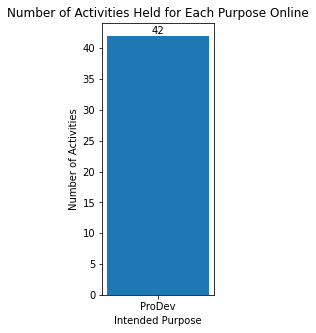

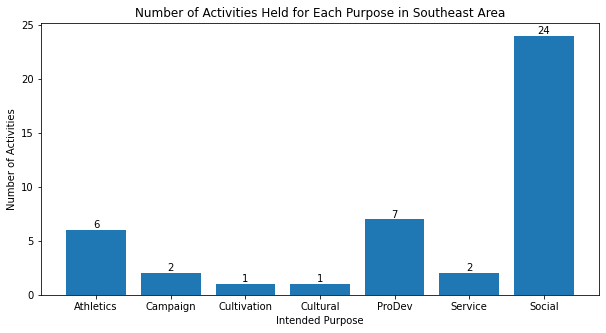

In [46]:
# Part Six: Other Analysis

# Step 8: Area Comparison
# Percentage Major Prospect is signifcant influenced by Area, 
# Compare Distribution of Intended Purpose and Intended Audience between Areas which have highest and relatively lower average Percentage Major Prospect(Online and Southeast Area)

# 8.1 Distribution of Intended Purpose between Online and Southeast Area
dataAlumniOnline = dataAlumni[dataAlumni["Area"]=="Online"]
dataAlumniSoutheast = dataAlumni[dataAlumni["Area"]=="Southeast Area"]

# 8.1.1 Distribution of Purpose of Online
purposeCount1 = dataAlumniOnline.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeCount1.columns=["Intended Purpose","Number of Activities"]
plt.figure(figsize=(2,5))
purposeBar=plt.bar(x=purposeCount1["Intended Purpose"],height=purposeCount1["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Number of Activities Held for Each Purpose Online")

n = len(dataAlumniOnline["Purpose"].unique())
purposeCountList=[]
for i in range(0, n):
    purposeCountList.append(purposeCount1.values[i][1])
for x,y in zip(purposeCount1["Intended Purpose"],purposeCountList):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
# 8.1.2 Distribution of Purpose in Southeast Area  
plt.figure(figsize=(10,5))
purposeCount = dataAlumniSoutheast.groupby(["Purpose"],as_index=False)["Event Name"].count()
purposeCount.columns=["Intended Purpose","Number of Activities"]
purposeBar=plt.bar(x=purposeCount["Intended Purpose"],height=purposeCount["Number of Activities"])
plt.xlabel("Intended Purpose")
plt.ylabel("Number of Activities")
plt.title("Number of Activities Held for Each Purpose in Southeast Area")

n = len(dataAlumniSoutheast["Purpose"].unique())
purposeCountList=[]
for i in range(0, n):
    purposeCountList.append(purposeCount.values[i][1])
for x,y in zip(purposeCount["Intended Purpose"],purposeCountList):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

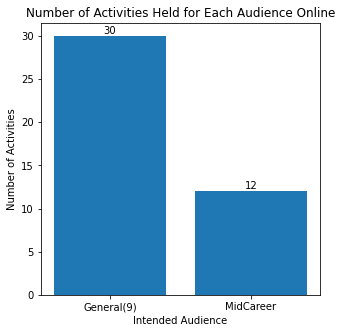

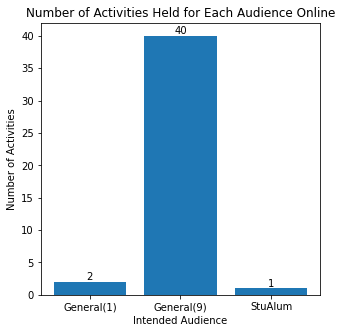

In [47]:
# 8.2 Distribution of Intended Audience between Online and Southeast Area
# 8.2.1 Distribution of Audience of Online 
purposeCount = dataAlumniOnline.groupby(["Audience"],as_index=False)["Event Name"].count()
purposeCount.columns=["Intended Audience","Number of Activities"]
plt.figure(figsize=(5,5))
purposeBar=plt.bar(x=purposeCount["Intended Audience"],height=purposeCount["Number of Activities"])
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Number of Activities Held for Each Audience Online")

n = len(dataAlumniOnline["Audience"].unique())
purposeCountList=[]
for i in range(0, n):
    purposeCountList.append(purposeCount.values[i][1])
for x,y in zip(purposeCount["Intended Audience"],purposeCountList):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")
    
    
# 8.2.2 Distribution of Audience in Southeast Area  
purposeCount = dataAlumniSoutheast.groupby(["Audience"],as_index=False)["Event Name"].count()
purposeCount.columns=["Intended Audience","Number of Activities"]
plt.figure(figsize=(5,5))
purposeBar=plt.bar(x=purposeCount["Intended Audience"],height=purposeCount["Number of Activities"])
plt.xlabel("Intended Audience")
plt.ylabel("Number of Activities")
plt.title("Number of Activities Held for Each Audience Online")

n = len(dataAlumniSoutheast["Audience"].unique())
purposeCountList=[]
for i in range(0, n):
    purposeCountList.append(purposeCount.values[i][1])
for x,y in zip(purposeCount["Intended Audience"],purposeCountList):
    plt.text(x,y,str(y),fontsize=10,ha="center",va="bottom")

# Finding: Online held activities with only one kind of Intended Purpose while Southeast Area has various of ones.
# Increasing the diversity of activities may be a good method for Online to increase Percentage Major Prospect. 